# Capstone Project Group : 03

**About Dataset**:

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:


Loanee Information (Demographic data like age, Identity proof etc.)


Loan Information (Disbursal details, loan to value ratio etc.)


Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)


Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

**Problem Statement:**

Financial institutions are facing significant losses due to defaults on vehicle loans, prompting a need for improved credit risk scoring models to minimize default rates. In this project, our goal is to accurately predict the probability of a borrower defaulting on a vehicle loan in the first Equated Monthly Installment (EMI) on the due date. 


**Objective:**

The primary objective of this project is to develop a robust predictive model that can identify loan applicants likely to default on their vehicle loans. By accurately assessing default risk, financial institutions can make informed lending decisions, ensuring that deserving applicants are not rejected while minimizing potential losses from defaults.


**Data Description:**

The dataset provided contains information on loan applicants, loan details, and credit bureau data. Key features include demographic information about the loanee (such as age, identity proof), loan details (disbursal amount, asset cost, loan-to-value ratio), and bureau data/history (credit score, number of active accounts, credit history).

### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Since we have to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI on the due date, along with AUC-ROC score, have taken F1-score(1s) and binary log loss as the performance metrics.**

In [2]:
df = pd.read_csv('train.csv')
df.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      01-01-84        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495      09-12-77   Self employed  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [3]:
df.shape

(233154, 41)

In [234]:
print('No. of rows:',df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 225439
No. of columns: 15


In [4]:
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace('.','_') for i in df.columns]

In [5]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [6]:
# Checking Duplicated value
print('The number of duplicates:',df.duplicated().sum())

The number of duplicates: 0


In [7]:
# Dropping the unnecessary features

df.drop(['uniqueid','branch_id','supplier_id','mobileno_avl_flag','current_pincode_id','employee_code_id','manufacturer_id','state_id'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   date_of_birth                        233154 non-null  object 
 4   employment_type                      225493 non-null  object 
 5   disbursaldate                        233154 non-null  object 
 6   aadhar_flag                          233154 non-null  int64  
 7   pan_flag                             233154 non-null  int64  
 8   voterid_flag                         233154 non-null  int64  
 9   driving_flag                         233154 non-null  int64  
 10  passport_flag                        233154 non-null  int64  
 11  perform_cns_s

In [9]:
df.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                          0
pri_overdue_accts                         0
pri_current_balance                       0
pri_sanctioned_amount                     0
pri_disbursed_amount                      0
sec_no_of_accts                           0
sec_active_accts                          0
sec_overdue_accts                         0
sec_current_balance             

In [10]:
# Dropping the rows with Employment Type Null as it constitutes just 3% of data
df = df.dropna()

In [11]:
df.describe(include='all')

disbursed_amount    asset_cost            ltv date_of_birth  \
count       225493.00000  2.254930e+05  225493.000000        225493   
unique               NaN           NaN            NaN         14417   
top                  NaN           NaN            NaN      01-01-88   
freq                 NaN           NaN            NaN          2143   
mean         54240.72883  7.563113e+04      74.806634           NaN   
std          12775.59006  1.852758e+04      11.441890           NaN   
min          13320.00000  3.700000e+04      13.500000           NaN   
25%          47049.00000  6.562500e+04      68.960000           NaN   
50%          53703.00000  7.080700e+04      76.890000           NaN   
75%          60213.00000  7.896600e+04      83.730000           NaN   
max         987354.00000  1.328954e+06      95.000000           NaN   

       employment_type disbursaldate    aadhar_flag       pan_flag  \
count           225493        225493  225493.000000  225493.000000   
unique               2            84            NaN            NaN   
top      Self employed      31-10-18            NaN            NaN   
freq            127635          8538            NaN            NaN   
mean               NaN           NaN       0.837720       0.077386   
std                NaN           NaN       0.368708       0.267204   
min                NaN           NaN       0.000000       0.000000   
25%                NaN           NaN       1.000000       0.000000   
50%                NaN           NaN       1.000000       0.000000   
75%                NaN           NaN       1.000000       0.000000   
max                NaN           NaN       1.000000       1.000000   

         voterid_flag   driving_flag  ...  sec_sanctioned_amount  \
count   225493.000000  225493.000000  ...           2.254930e+05   
unique            NaN            NaN  ...                    NaN   
top               NaN            NaN  ...                    NaN   
freq              NaN            NaN  ...                    NaN   
mean         0.147127       0.023686  ...           7.489187e+03   
std          0.354233       0.152069  ...           1.860432e+05   
min          0.000000       0.000000  ...           0.000000e+00   
25%          0.000000       0.000000  ...           0.000000e+00   
50%          0.000000       0.000000  ...           0.000000e+00   
75%          0.000000       0.000000  ...           0.000000e+00   
max          1.000000       1.000000  ...           3.000000e+07   

        sec_disbursed_amount primary_instal_amt  sec_instal_amt  \
count           2.254930e+05       2.254930e+05    2.254930e+05   
unique                   NaN                NaN             NaN   
top                      NaN                NaN             NaN   
freq                     NaN                NaN             NaN   
mean            7.371104e+03       1.299246e+04    3.256845e+02   
std             1.854703e+05       1.497084e+05    1.575617e+04   
min             0.000000e+00       0.000000e+00    0.000000e+00   
25%             0.000000e+00       0.000000e+00    0.000000e+00   
50%             0.000000e+00       0.000000e+00    0.000000e+00   
75%             0.000000e+00       2.045000e+03    0.000000e+00   
max             3.000000e+07       2.564281e+07    4.170901e+06   

        new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
count                  225493.000000                        225493.000000   
unique                           NaN                                  NaN   
top                              NaN                                  NaN   
freq                             NaN                                  NaN   
mean                        0.386602                             0.098708   
std                         0.959668                             0.386376   
min                         0.000000                             0.000000   
25%                         0.000000                             0.000000   

# Dependent variable distribution

In [12]:
pct_loan_default = df['loan_default'].value_counts(normalize=True)*100
pct_loan_default

loan_default
0    78.28447
1    21.71553
Name: proportion, dtype: float64

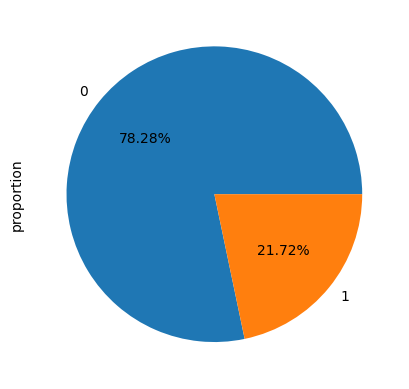

In [13]:
df['loan_default'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

In [14]:
import plotly.express as px 
fig = px.pie(values=pct_loan_default.values, names=['Not defaulted','Defaulted']) 
fig.show()

**78.3% observations in the dataset have not defaulted vehicle loan while 21.7% have defaulted loan. It is slighly imbalanced dataset.**

# Categorical Features Analysis

## Employment_Type

In [15]:
df1 = pd.crosstab(df['employment_type'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [16]:
df['employment_type'].value_counts(normalize=True)*100

employment_type
Self employed    56.602644
Salaried         43.397356
Name: proportion, dtype: float64

In [17]:
print('Percentage of salaried people who have defaulted:',
     np.round(df[(df['employment_type']=='Salaried') & (df['loan_default']==1)].shape[0]/(df[df['employment_type']=='Salaried'].shape[0])*100,3))
print('Percentage of self employed people who have defaulted:',
     np.round(df[(df['employment_type']=='Self employed') & (df['loan_default']==1)].shape[0]/(df[df['employment_type']=='Self employed'].shape[0])*100,3))

Percentage of salaried people who have defaulted: 20.346
Percentage of self employed people who have defaulted: 22.766


## Aadhar

In [18]:
df1 = pd.crosstab(df['aadhar_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [19]:
df['aadhar_flag'].value_counts(normalize=True)*100

aadhar_flag
1    83.772002
0    16.227998
Name: proportion, dtype: float64

In [20]:
print('Percentage of people who have given their Aadhar details and defaulted:',
     np.round(df[(df['aadhar_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['aadhar_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Aadhar details and defaulted:',
     np.round(df[(df['aadhar_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['aadhar_flag']==0].shape[0])*100,3))

Percentage of people who have given their Aadhar details and defaulted: 20.927
Percentage of people who have not given their Aadhar details and defaulted: 25.786


## PAN

In [21]:
df1 = pd.crosstab(df['pan_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [22]:
df['pan_flag'].value_counts(normalize=True)*100

pan_flag
0    92.261401
1     7.738599
Name: proportion, dtype: float64

In [23]:
print('Percentage of people who have given their PAN details and defaulted:',
     np.round(df[(df['pan_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['pan_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their PAN details and defaulted:',
     np.round(df[(df['pan_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['pan_flag']==0].shape[0])*100,3))

Percentage of people who have given their PAN details and defaulted: 22.011
Percentage of people who have not given their PAN details and defaulted: 21.691


## Voter ID

In [24]:
df1 = pd.crosstab(df['voterid_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [25]:
df['voterid_flag'].value_counts(normalize=True)*100

voterid_flag
0    85.287348
1    14.712652
Name: proportion, dtype: float64

In [26]:
print('Percentage of people who have given their voter_id details and defaulted:',
     np.round(df[(df['voterid_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['voterid_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their voter_id details and defaulted:',
     np.round(df[(df['voterid_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['voterid_flag']==0].shape[0])*100,3))

Percentage of people who have given their voter_id details and defaulted: 26.26
Percentage of people who have not given their voter_id details and defaulted: 20.932


## DL

In [27]:
df1 = pd.crosstab(df['driving_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [28]:
df['driving_flag'].value_counts(normalize=True)*100

driving_flag
0    97.631412
1     2.368588
Name: proportion, dtype: float64

In [29]:
print('Percentage of people who have given their DL details and defaulted:',
     np.round(df[(df['driving_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['driving_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their DL details and defaulted:',
     np.round(df[(df['driving_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['driving_flag']==0].shape[0])*100,3))

Percentage of people who have given their DL details and defaulted: 20.24
Percentage of people who have not given their DL details and defaulted: 21.751


## Passport

In [30]:
df1 = pd.crosstab(df['passport_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [31]:
df['passport_flag'].value_counts(normalize=True)*100

passport_flag
0    99.786246
1     0.213754
Name: proportion, dtype: float64

In [32]:
print('Percentage of people who have given their Passport details and defaulted:',
     np.round(df[(df['passport_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['passport_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Passport details and defaulted:',
     np.round(df[(df['passport_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['passport_flag']==0].shape[0])*100,3))

Percentage of people who have given their Passport details and defaulted: 14.73
Percentage of people who have not given their Passport details and defaulted: 21.73


In [33]:
#Encoding Employment Type
df['self_employed'] = pd.get_dummies(df['employment_type'],drop_first=True)

In [34]:
df.drop('employment_type',axis=1,inplace=True)
df.head()

disbursed_amount  asset_cost    ltv date_of_birth disbursaldate  \
0             50578       58400  89.55      01-01-84      03-08-18   
1             47145       65550  73.23      31-07-85      26-09-18   
2             53278       61360  89.63      24-08-85      01-08-18   
3             57513       66113  88.48      30-12-93      26-10-18   
4             52378       60300  88.39      09-12-77      26-09-18   

   aadhar_flag  pan_flag  voterid_flag  driving_flag  passport_flag  ...  \
0            1         0             0             0              0  ...   
1            1         0             0             0              0  ...   
2            1         0             0             0              0  ...   
3            1         0             0             0              0  ...   
4            1         0             0             0              0  ...   

   sec_disbursed_amount primary_instal_amt  sec_instal_amt  \
0                     0                  0               0   
1                     0               1991               0   
2                     0                  0               0   
3                     0                 31               0   
4                     0                  0               0   

   new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   average_acct_age  credit_history_length  no_of_inquiries  loan_default  \
0         0yrs 0mon              0yrs 0mon                0             0   
1        1yrs 11mon             1yrs 11mon                0             1   
2         0yrs 0mon              0yrs 0mon                0             0   
3         0yrs 8mon              1yrs 3mon                1             1   
4         0yrs 0mon              0yrs 0mon                1             1   

   self_employed  
0          False  
1           True  
2           True  
3           True  
4           True  

[5 rows x 33 columns]

**Feature importances of different categorical features**

In [35]:
df1 = df[['self_employed','aadhar_flag','pan_flag','voterid_flag','driving_flag',
         'passport_flag']]

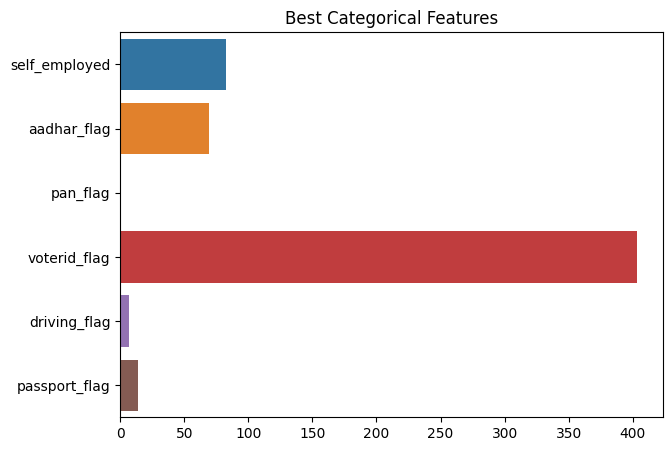

In [36]:
# Feature importances using SelectKBest algorithm using chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2
n = SelectKBest(score_func=chi2, k='all')
catcols=n.fit(df1,df['loan_default'])
plt.figure(figsize=(7,5))
sns.barplot(x=catcols.scores_,y=df1.columns)
plt.title('Best Categorical Features')
plt.show()

In [37]:
# Feature importances using Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df1,df['loan_default'])

ExtraTreesClassifier()

In [38]:
pd.DataFrame(model.feature_importances_,index=df1.columns,columns=['Feature_Importance']).sort_values(by='Feature_Importance',ascending=False)

Feature_Importance
voterid_flag             0.315146
self_employed            0.242579
aadhar_flag              0.238114
pan_flag                 0.157325
driving_flag             0.030120
passport_flag            0.016716

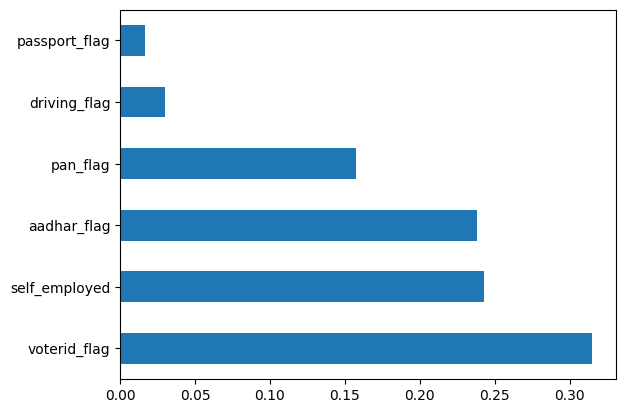

In [39]:
ranked_features=pd.Series(model.feature_importances_,index=df1.columns)
ranked_features.nlargest(6).plot(kind='barh')
plt.show()

In [40]:
# Dropping unncessary features based on the above analysis

df.drop(['pan_flag','driving_flag','passport_flag'],axis=1,inplace=True)

# Numerical Features Analysis

## Disbursed Amount

In [41]:
df['disbursed_amount'].describe()

count    225493.00000
mean      54240.72883
std       12775.59006
min       13320.00000
25%       47049.00000
50%       53703.00000
75%       60213.00000
max      987354.00000
Name: disbursed_amount, dtype: float64

In [42]:
disbursed_amount_non_default = df[df['loan_default']==0]['disbursed_amount']
disbursed_amount_default = df[df['loan_default']==1]['disbursed_amount']

In [43]:
pd.DataFrame([disbursed_amount_non_default.describe(), disbursed_amount_default.describe()], index=['non_defaulters','defaulters'])

count          mean           std      min      25%  \
non_defaulters  176526.0  53707.242282  12906.119631  13320.0  46349.0   
defaulters       48967.0  56163.947454  12099.967718  13369.0  49303.0   

                    50%      75%       max  
non_defaulters  53278.0  59847.0  987354.0  
defaulters      55359.0  61923.0  191392.0

The maximum disbursed amount is way higher for non-defaulters.

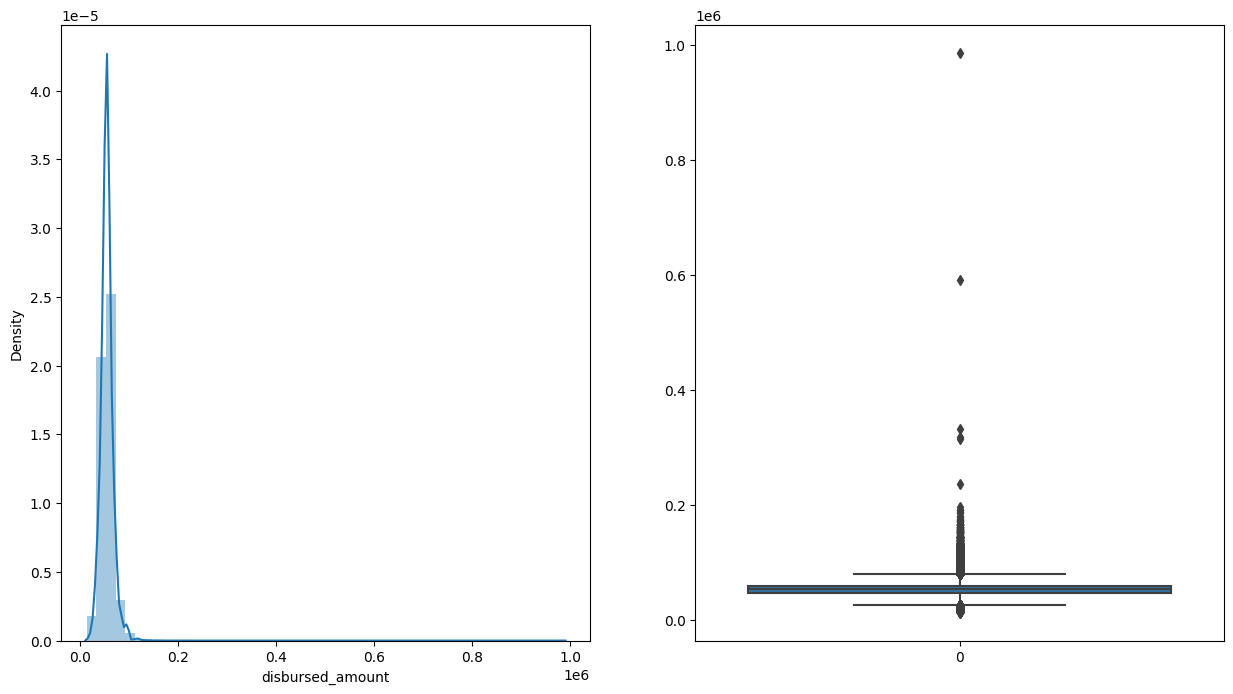

In [44]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['disbursed_amount'])

plt.subplot(1,2,2)
sns.boxplot(df['disbursed_amount'])

plt.show()

The distribution is highly right skewed and there are extreme values

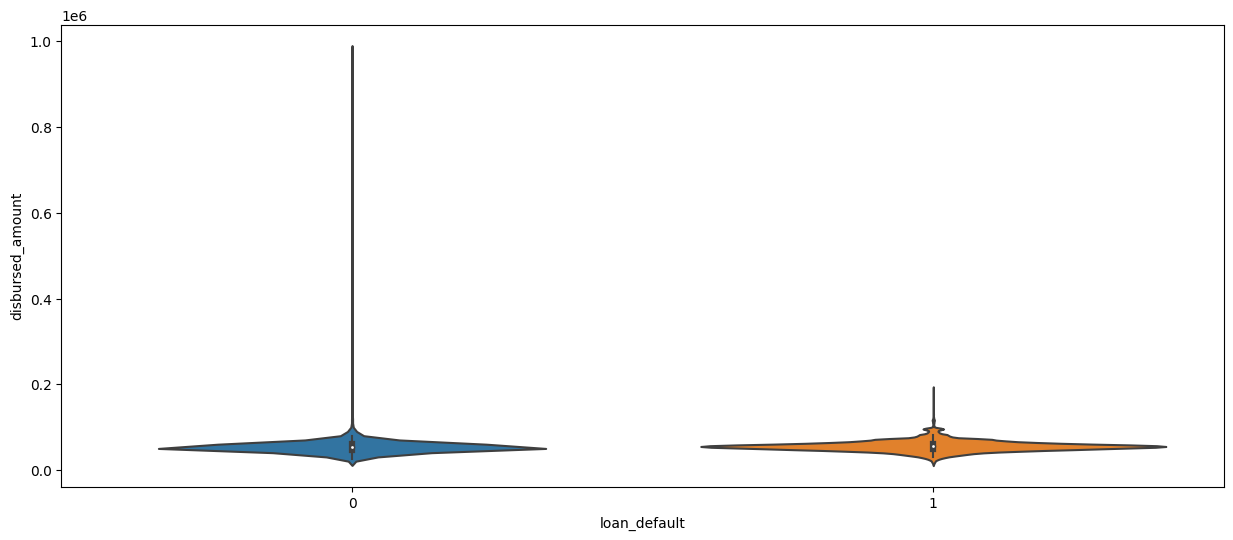

In [45]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='disbursed_amount',data=df)
plt.show()

More outliers/extreme values are present for non defaulters

## Asset Cost

In [46]:
df['asset_cost'].describe()

count    2.254930e+05
mean     7.563113e+04
std      1.852758e+04
min      3.700000e+04
25%      6.562500e+04
50%      7.080700e+04
75%      7.896600e+04
max      1.328954e+06
Name: asset_cost, dtype: float64

In [47]:
asset_cost_non_default = df[df['loan_default']==0]['asset_cost']
asset_cost_default = df[df['loan_default']==1]['asset_cost']

In [48]:
pd.DataFrame([asset_cost_non_default.describe(), asset_cost_default.describe()], index=['non_defaulters','defaulters'])

count          mean           std      min      25%  \
non_defaulters  176526.0  75478.714484  18506.576196  37000.0  65588.0   
defaulters       48967.0  76180.596504  18592.903319  37000.0  65800.0   

                    50%       75%        max  
non_defaulters  70696.0  78742.75  1328954.0  
defaulters      71205.0  79950.00   281164.0

The maximum asset cost of non defaulters is way higher than that of defaulters

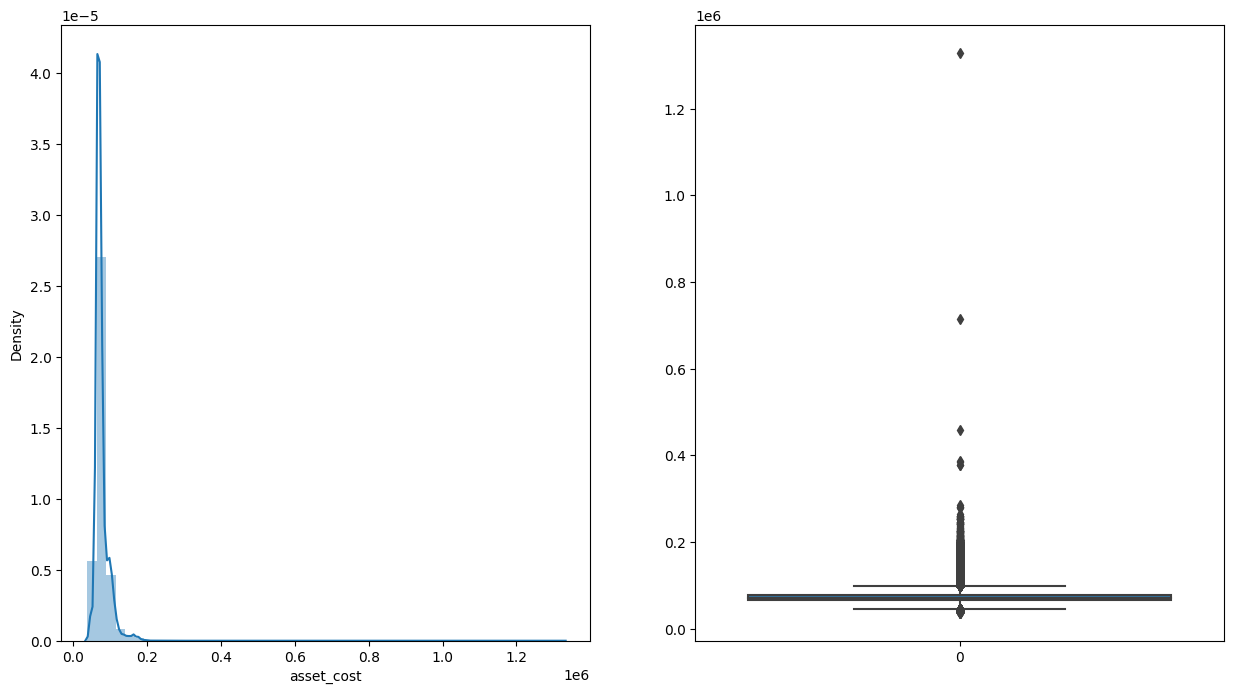

In [49]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['asset_cost'])

plt.subplot(1,2,2)
sns.boxplot(df['asset_cost'])

plt.show()

The distribution is highly right skewed and there are extreme values.

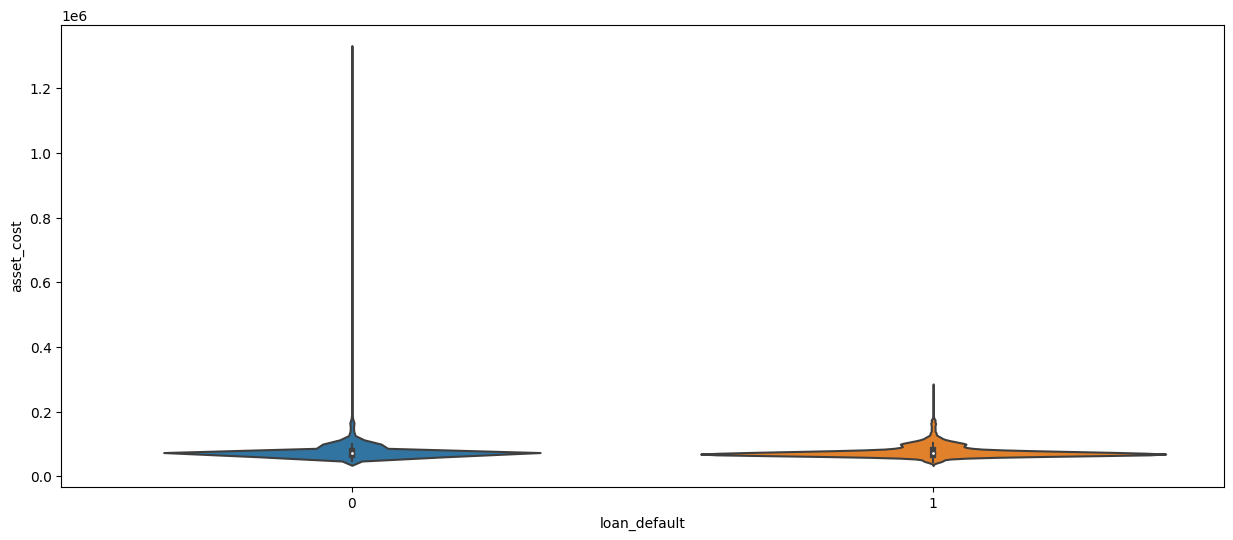

In [50]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='asset_cost',data=df)
plt.show()

Extreme/outlier values of asset_cost are present among non defaulters

## Ltv

In [51]:
df['ltv'].describe()

count    225493.000000
mean         74.806634
std          11.441890
min          13.500000
25%          68.960000
50%          76.890000
75%          83.730000
max          95.000000
Name: ltv, dtype: float64

In [52]:
ltv_non_default = df[df['loan_default']==0]['ltv']
ltv_default = df[df['loan_default']==1]['ltv']

In [53]:
pd.DataFrame([ltv_non_default.describe(), ltv_default.describe()], index=['non_defaulters','defaulters'])

count       mean        std   min    25%    50%    75%  \
non_defaulters  176526.0  74.216090  11.666502  13.5  68.09  76.09  83.23   
defaulters       48967.0  76.935543  10.315922  15.3  72.13  79.12  84.71   

                 max  
non_defaulters  95.0  
defaulters      95.0

The ltv is almost same for both defaulters and non defaulters

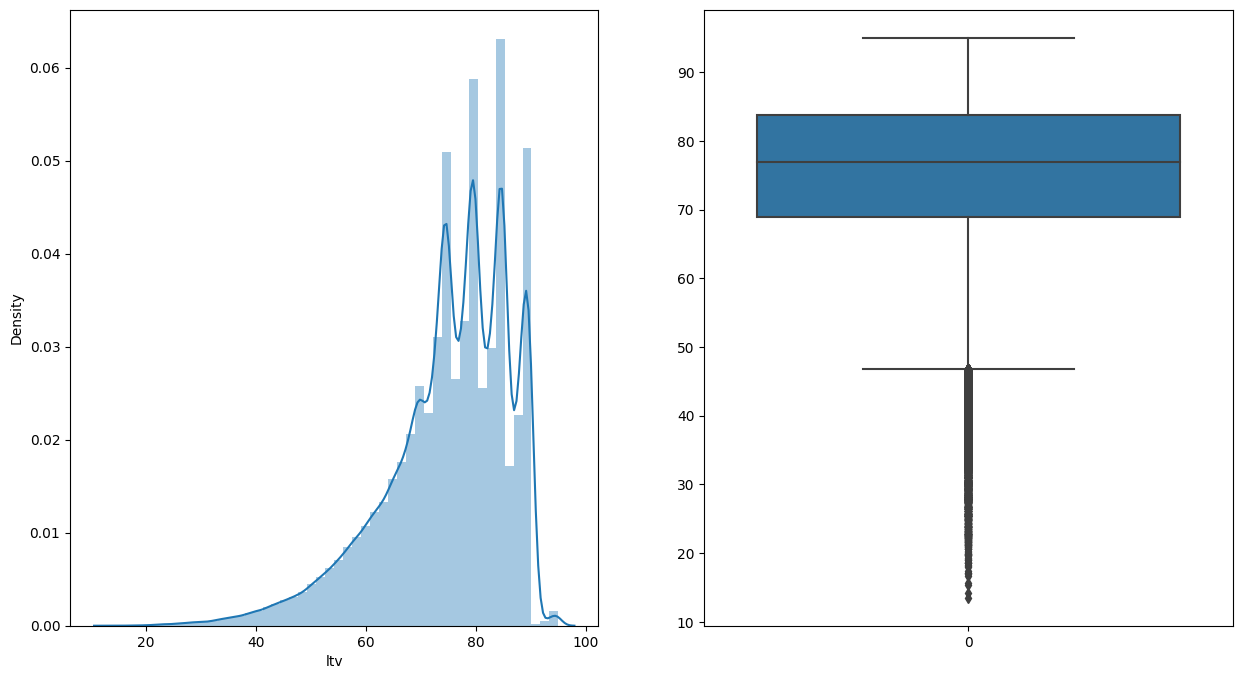

In [54]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['ltv'])

plt.subplot(1,2,2)
sns.boxplot(df['ltv'])

plt.show()

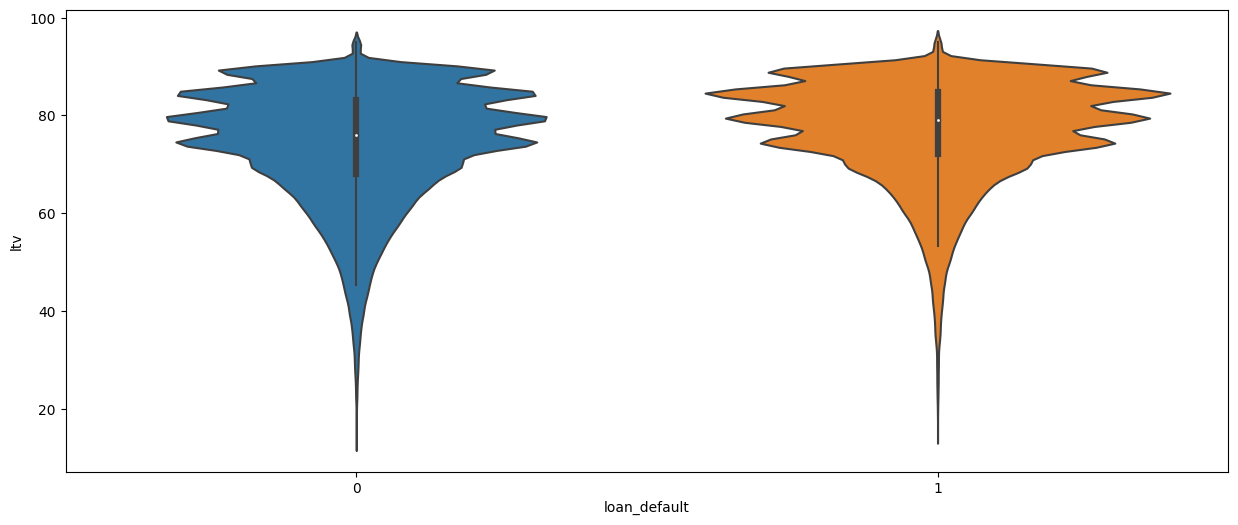

In [55]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='ltv',data=df)
plt.show()

## Age

In [56]:
# We have DOB of the customer and the date of disbursal, from which we need to calculate the age of the customer at the
# time of loan disbursal

def age(dob):
    yr = int(dob.split('-')[2])
    if yr >=0 and yr < 21:
        return yr + 2000
    else:
         return yr + 1900
        
df['date_of_birth'] = df['date_of_birth'].apply(age)
df['disbursaldate'] = df['disbursaldate'].apply(age)
# Age of the customer at the time of disbursement of fund
df['age'] = df['disbursaldate'] - df['date_of_birth']

In [57]:
# Dropping the DOB and Disbursal Date
df.drop(['date_of_birth','disbursaldate'],axis=1,inplace=True)

In [58]:
df['age'].describe()

count    225493.000000
mean         34.448009
std           9.666254
min          20.000000
25%          26.000000
50%          33.000000
75%          41.000000
max          64.000000
Name: age, dtype: float64

In [59]:
age_non_defaulters = df[df['loan_default'] == 0]['age']
age_defaulters = df[df['loan_default'] == 1]['age']

In [60]:
pd.DataFrame([age_non_defaulters.describe(), age_defaulters.describe()], index=['non_defaulters','defaulters'])

count       mean       std   min   25%   50%   75%   max
non_defaulters  176526.0  34.636609  9.697518  20.0  27.0  33.0  41.0  64.0
defaulters       48967.0  33.768109  9.521842  21.0  26.0  32.0  40.0  64.0

All the stats of age are almost same for defaulters and non defaulters

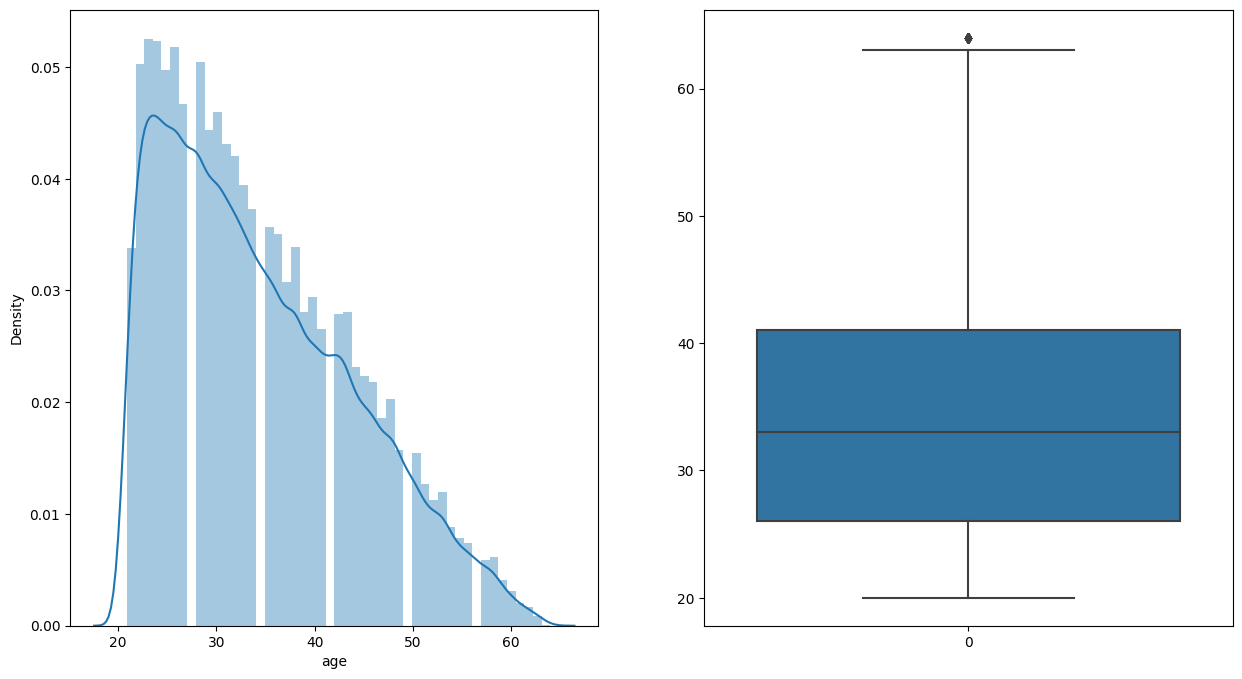

In [61]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['age'])

plt.show()

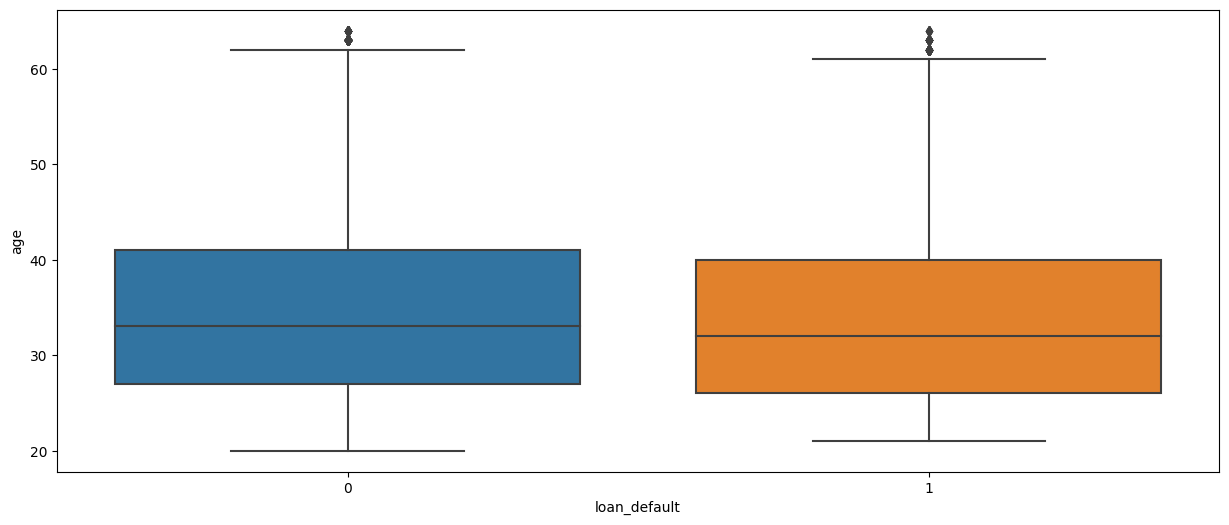

In [62]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='loan_default',y='age',data=df)
plt.show()

The Age at the time of loan disbursement is almost similar among defaulters and non defaulters

## Perform CNS score / CIBIL score

In [63]:
df['perform_cns_score'].describe()

count    225493.000000
mean        293.040449
std         338.874784
min           0.000000
25%           0.000000
50%          15.000000
75%         680.000000
max         890.000000
Name: perform_cns_score, dtype: float64

In [64]:
cibil_non_default = df[df['loan_default']==0]['perform_cns_score']
cibil_default = df[df['loan_default']==1]['perform_cns_score']

In [65]:
pd.DataFrame([cibil_non_default.describe(), cibil_default.describe()], index=['non_defaulters','defaulters'])

count        mean         std  min  25%   50%    75%    max
non_defaulters  176526.0  303.700934  343.367235  0.0  0.0  15.0  692.0  890.0
defaulters       48967.0  254.609410  319.221743  0.0  0.0   0.0  611.5  879.0

Here we can observe a difference in the mean and median cibil scores among the defaulters and non defaulters. The mean and median cibil scores are higher for non defaulters.

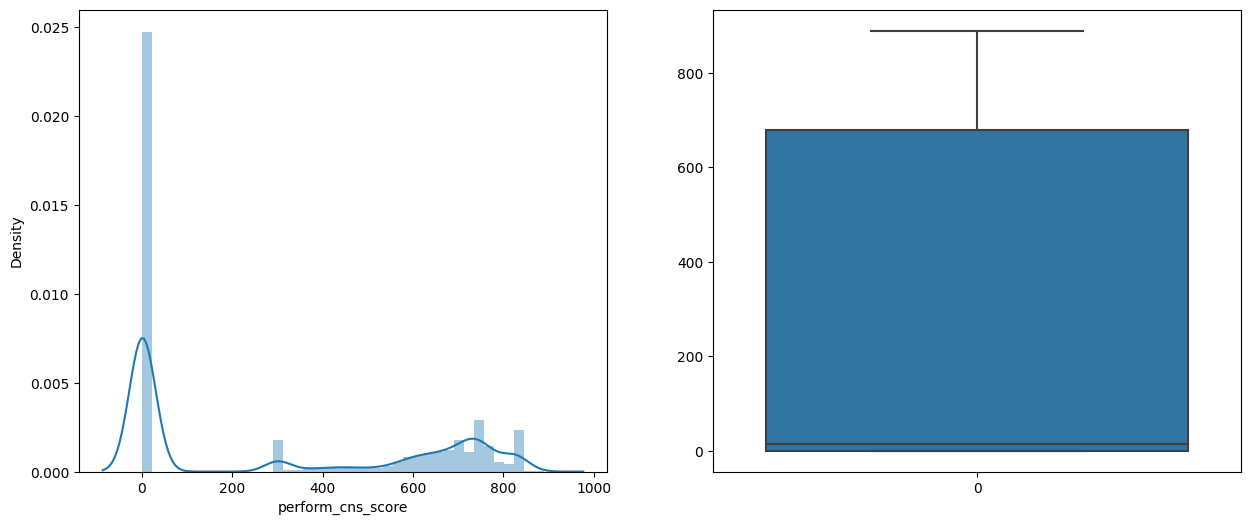

In [66]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['perform_cns_score'])

plt.subplot(1,2,2)
sns.boxplot(df['perform_cns_score'])

plt.show()

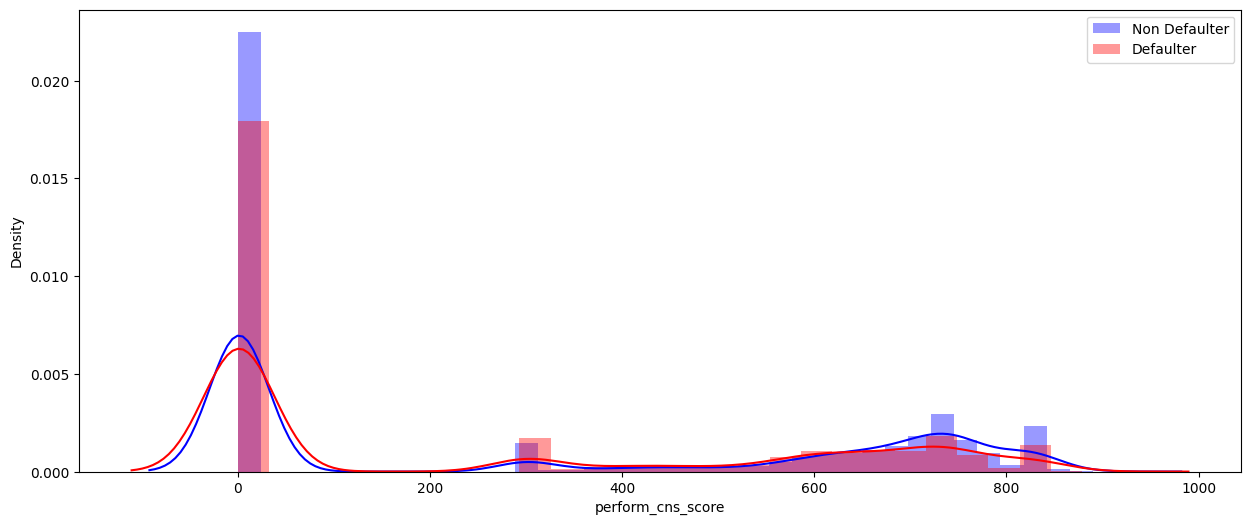

In [67]:
plt.figure(figsize=(15,6))

sns.distplot(cibil_non_default, color='blue', label = 'Non Defaulter')
sns.distplot(cibil_default, color='red', label = 'Defaulter')

plt.legend()
plt.show()

CIBIL score distribution is looking almost similar for defaulters and non defaulters

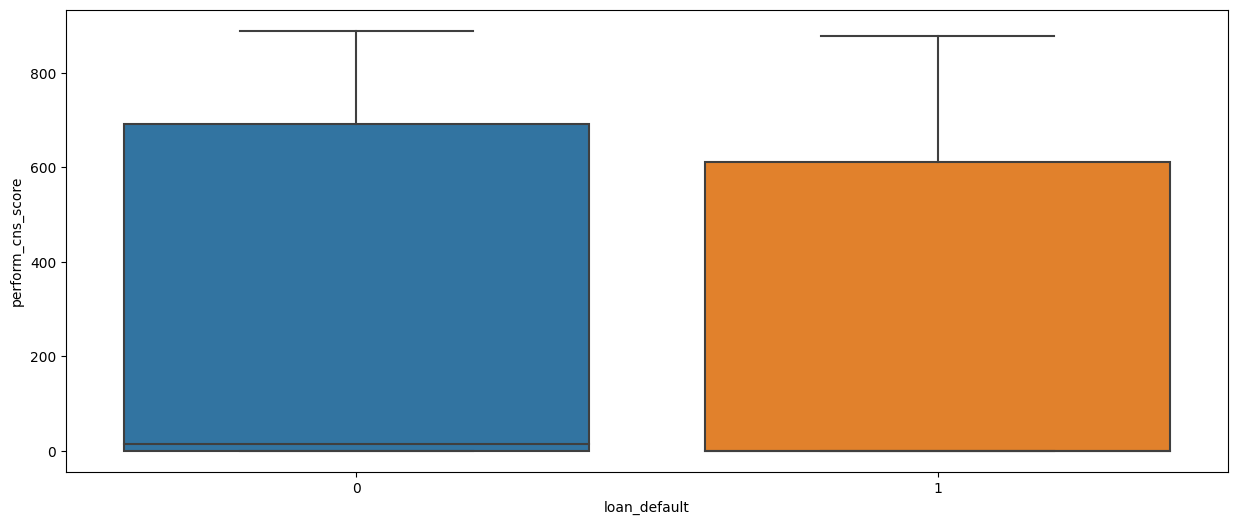

In [68]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='loan_default',y='perform_cns_score',data=df)
plt.show()

We can see that the mean and median cibil scores of non defaulters is sligtly higher than that of defaulters. Also the 75th percentile value of cibil score is higher for defaulters. The max score is nearly same for defaulters and non defaulters

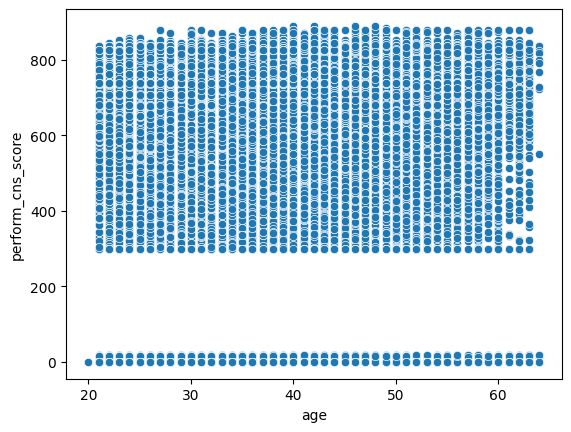

In [69]:
sns.scatterplot(x=df['age'],y=df['perform_cns_score'])

plt.show()

# Here we can see that irrespective of age CIBIL score variation is same 

## Perform cns score description

In [70]:
df['perform_cns_score_description'].describe()

count                          225493
unique                             20
top       No Bureau History Available
freq                           111773
Name: perform_cns_score_description, dtype: object

In [71]:
df['perform_cns_score_description'].value_counts()

perform_cns_score_description
No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the c

In [72]:
cnsd = pd.crosstab(index=df['perform_cns_score_description'], columns=df['loan_default'])
cnsd['Percent of Defaulters'] = (cnsd[1] / (cnsd[0] + cnsd[1]))*100
cnsd

loan_default                                            0      1  \
perform_cns_score_description                                      
A-Very Low Risk                                     11518   2272   
B-Very Low Risk                                      7854   1178   
C-Very Low Risk                                     13009   2706   
D-Very Low Risk                                      9478   1656   
E-Low Risk                                           4717    978   
F-Low Risk                                           6767   1542   
G-Low Risk                                           3125    777   
H-Medium Risk                                        5082   1613   
I-Medium Risk                                        3957   1483   
J-High Risk                                          2739    928   
K-High Risk                                          5853   2254   
L-Very High Risk                                      806    316   
M-Very High Risk                                     6009   2623   
No Bureau History Available                         85824  25949   
Not Scored: More than 50 active Accounts found          3      0   
Not Scored: No Activity seen on the customer (I...   2304    511   
Not Scored: No Updates available in last 36 months   1189    288   
Not Scored: Not Enough Info available on the cu...   2814    743   
Not Scored: Only a Guarantor                          751    206   
Not Scored: Sufficient History Not Available         2727    944   

loan_default                                        Percent of Defaulters  
perform_cns_score_description                                              
A-Very Low Risk                                                 16.475707  
B-Very Low Risk                                                 13.042516  
C-Very Low Risk                                                 17.219217  
D-Very Low Risk                                                 14.873361  
E-Low Risk                                                      17.172959  
F-Low Risk                                                      18.558190  
G-Low Risk                                                      19.912865  
H-Medium Risk                                                   24.092606  
I-Medium Risk                                                   27.261029  
J-High Risk                                                     25.306790  
K-High Risk                                                     27.803133  
L-Very High Risk                                                28.163993  
M-Very High Risk                                                30.386932  
No Bureau History Available                                     23.215803  
Not Scored: More than 50 active Accounts found                   0.000000  
Not Scored: No Activity seen on the customer (I...              18.152753  
Not Scored: No Updates available in last 36 months              19.498984  
Not Scored: Not Enough Info available on the cu...              20.888389  
Not Scored: Only a Guarantor                                    21.525601  
Not Scored: Sufficient History Not Available                    25.715064

In [73]:
df.groupby(by='perform_cns_score_description')['perform_cns_score'].agg([min,max]).sort_values(by='min')

min  max
perform_cns_score_description                               
No Bureau History Available                           0    0
Not Scored: More than 50 active Accounts found       11   11
Not Scored: Only a Guarantor                         14   14
Not Scored: Sufficient History Not Available         15   15
Not Scored: No Activity seen on the customer (I...   16   16
Not Scored: Not Enough Info available on the cu...   17   17
Not Scored: No Updates available in last 36 months   18   18
M-Very High Risk                                    300  300
L-Very High Risk                                    301  350
K-High Risk                                         351  520
J-High Risk                                         521  570
I-Medium Risk                                       571  600
H-Medium Risk                                       601  630
G-Low Risk                                          631  650
F-Low Risk                                          651  680
E-Low Risk                                          681  705
D-Very Low Risk                                     706  735
C-Very Low Risk                                     736  760
B-Very Low Risk                                     761  805
A-Very Low Risk                                     806  890

We can see that as the risk increases, the percent of default also increases

In [74]:
# grouping all same risk into one and creating a new feature with only six classes
# e.g A-Very Low Risk to Very Low Risk
#     B-Very Low Risk to Very Low Risk

risk = []
for i in df['perform_cns_score_description']:
    if('Very Low' in i):
        risk.append('Very Low Risk')
    elif('Low' in i):
        risk.append('Low Risk')
    elif('Medium' in i):
        risk.append('Medium Risk')
    elif('Very High' in i):
        risk.append('Very High Risk')
    elif('High' in i):
        risk.append('High Risk')
    else:
        risk.append('Not Scored')

In [75]:
df['risk'] = risk

In [76]:
risk_counts = pd.Series(risk).value_counts().sort_values()
risk_counts

Very High Risk      9754
High Risk          11774
Medium Risk        12135
Low Risk           17906
Very Low Risk      49671
Not Scored        124253
Name: count, dtype: int64

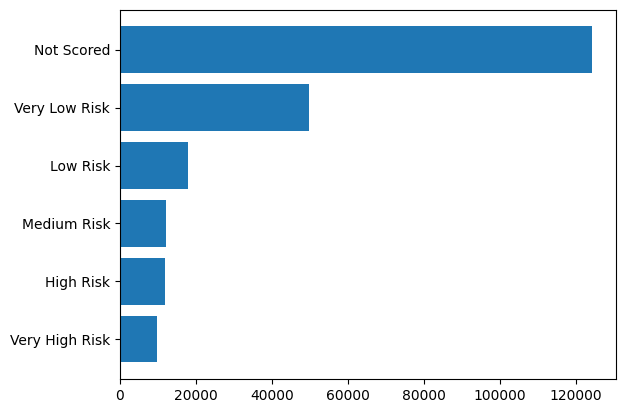

In [77]:
plt.barh(y = risk_counts.index,width=risk_counts.values)
plt.show()

In [78]:
risk_counts = pd.crosstab(index=df['risk'], columns=df['loan_default'])

risk_counts['Percent_of_default'] = round((risk_counts[1]/risk_counts.sum(axis=1))*100,2)

risk_counts.sort_values(by='Percent_of_default',ascending=False)

loan_default        0      1  Percent_of_default
risk                                            
Very High Risk   6815   2939               30.13
High Risk        8592   3182               27.03
Medium Risk      9039   3096               25.51
Not Scored      95612  28641               23.05
Low Risk        14609   3297               18.41
Very Low Risk   41859   7812               15.73

In [79]:
df.groupby(by='risk')['perform_cns_score'].agg([min,max]).sort_values(by='min')

min  max
risk                    
Not Scored        0   18
Very High Risk  300  350
High Risk       351  570
Medium Risk     571  630
Low Risk        631  705
Very Low Risk   706  890

In [80]:
risk_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

df['risk'] = df['risk'].map(risk_map)

In [81]:
risk_counts = pd.crosstab(index=df['risk'], columns=df['loan_default'])
risk_counts['Percent of Defaluters'] = (risk_counts[1] / (risk_counts[0] + risk_counts[1]))*100
risk_counts.sort_values(by='Percent of Defaluters', ascending=False)

loan_default      0      1  Percent of Defaluters
risk                                             
 0             6815   2939              30.131228
 1             8592   3182              27.025650
 2             9039   3096              25.512979
-1            95612  28641              23.050550
 3            14609   3297              18.412823
 4            41859   7812              15.727487

We can see that the percent of defaulters are less for low risk and very low risk categories.

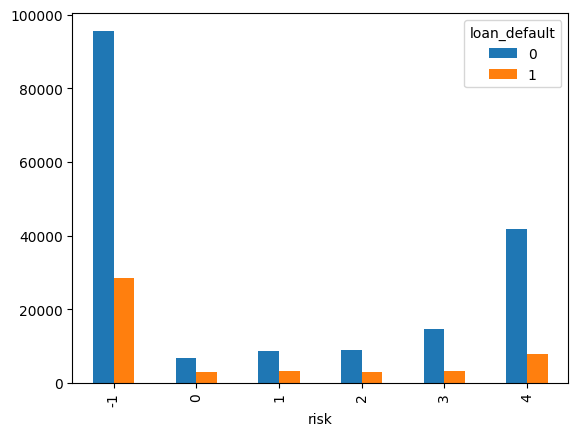

In [82]:
pd.crosstab(index=df['risk'], columns=df['loan_default']).plot(kind='bar')
plt.show()

In [83]:
df.drop('perform_cns_score_description',axis=1,inplace=True)

## Average Account Age and Credit History Length

In [84]:
# We have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
# They have AplhaNumeric Values,changing them to Months

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [85]:
df['credit_history_length'] = df['credit_history_length'].apply(duration)
df['average_acct_age'] = df['average_acct_age'].apply(duration)

In [86]:
df['average_acct_age'].describe()

count    225493.000000
mean          9.028302
std          15.161620
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: average_acct_age, dtype: float64

In [87]:
acct_age_non_defaulters = df[df['loan_default'] == 0]['average_acct_age']
acct_age_defaulters = df[df['loan_default'] == 1]['average_acct_age']

In [88]:
pd.DataFrame([acct_age_non_defaulters.describe(), acct_age_defaulters.describe()], index=['non_defaulters','defaulters'])

count      mean        std  min  25%  50%   75%    max
non_defaulters  176526.0  9.236073  15.321127  0.0  0.0  1.0  13.0  369.0
defaulters       48967.0  8.279290  14.547651  0.0  0.0  0.0  12.0  188.0

The maximum average account age is higher for non defaulters

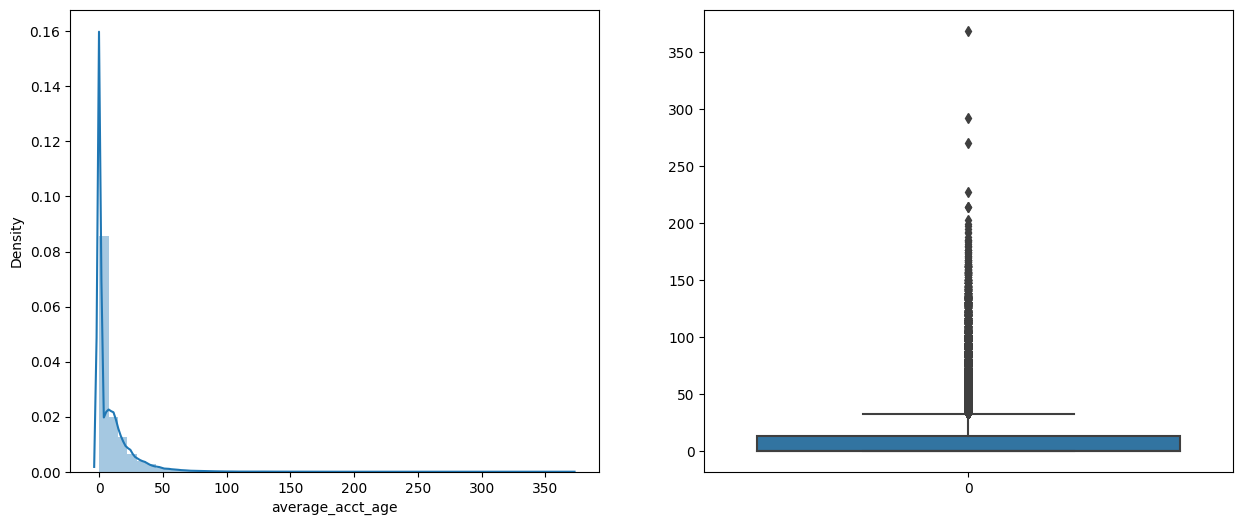

In [89]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['average_acct_age'])

plt.subplot(1,2,2)
sns.boxplot(df['average_acct_age'])

plt.show()

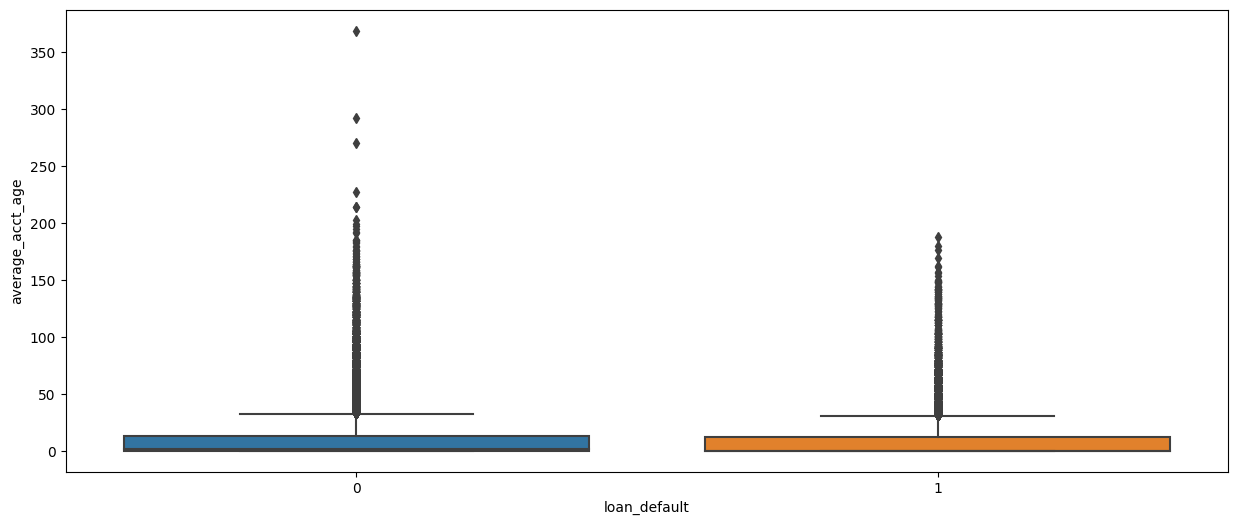

In [90]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='loan_default',y='average_acct_age',data=df)
plt.show()

It is highly right skewed

## Credit History Length

In [91]:
df['credit_history_length'].describe()

count    225493.000000
mean         16.453087
std          28.676869
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: credit_history_length, dtype: float64

In [92]:
credit_non_default = df[df['loan_default'] == 0]['credit_history_length']
credit_default = df[df['loan_default'] == 1]['credit_history_length']

In [93]:
pd.DataFrame([credit_non_default.describe(), credit_default.describe()], index=['non_defaulters','defaulters'])

count       mean        std  min  25%  50%   75%    max
non_defaulters  176526.0  17.107848  29.456617  0.0  0.0  1.0  24.0  449.0
defaulters       48967.0  14.092675  25.531302  0.0  0.0  0.0  21.0  468.0

The mean and std is slightly higher for non defaulters

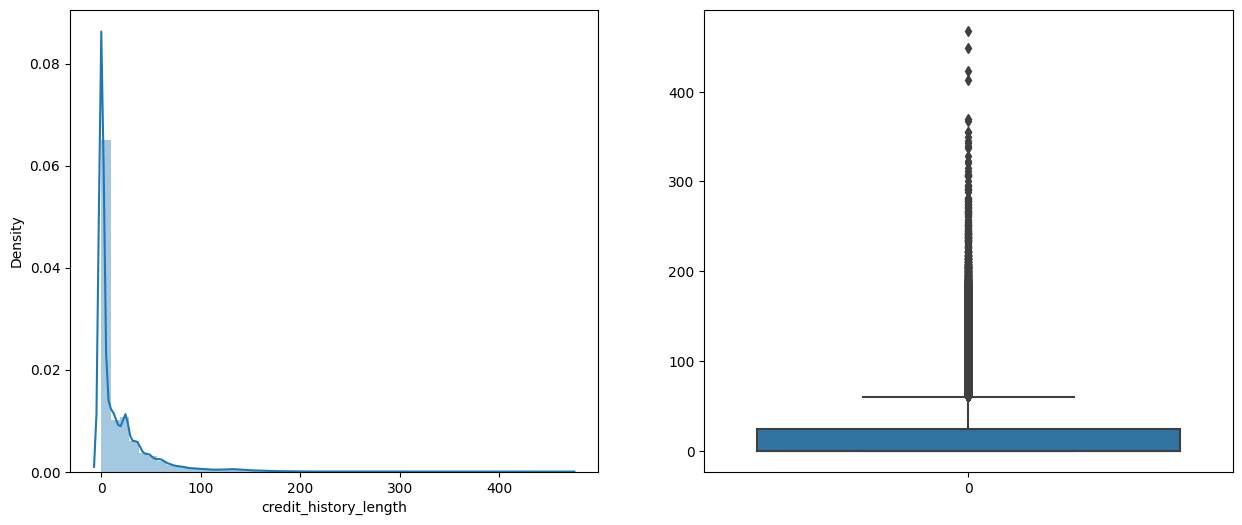

In [94]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['credit_history_length'])

plt.subplot(1,2,2)
sns.boxplot(df['credit_history_length'])

plt.show()

Highly right skewed

## New accounts in last six months

In [95]:
counts = df['new_accts_in_last_six_months'].value_counts()
percent = df['new_accts_in_last_six_months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
new_accts_in_last_six_months                         
0                             174944        77.582896
1                              31361        13.907749
2                              10806         4.792166
3                               4375         1.940193
4                               1918         0.850581
5                                947         0.419969
6                                473         0.209763
7                                293         0.129938
8                                143         0.063417
9                                 78         0.034591
10                                54         0.023948
11                                30         0.013304
12                                20         0.008869
13                                15         0.006652
14                                11         0.004878
16                                 6         0.002661
17                                 5         0.002217
15                                 2         0.000887
19                                 2         0.000887
23                                 2         0.000887
20                                 2         0.000887
18                                 2         0.000887
22                                 1         0.000443
35                                 1         0.000443
28                                 1         0.000443
21                                 1         0.000443

Most of them have not opened any new account in the last 6 months

## Delinquent Accounts in last six months

In [96]:
counts = df['delinquent_accts_in_last_six_months'].value_counts()
percent = df['delinquent_accts_in_last_six_months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
delinquent_accts_in_last_six_months                         
0                                    207647        92.085785
1                                     14680         6.510180
2                                      2405         1.066552
3                                       519         0.230162
4                                       136         0.060312
5                                        56         0.024834
6                                        20         0.008869
7                                        12         0.005322
8                                         7         0.003104
12                                        3         0.001330
11                                        3         0.001330
9                                         2         0.000887
10                                        2         0.000887
20                                        1         0.000443

We can see that 92% of customers have not defaulted loans in last six months. 8% of customers have deafulted loans for >= 1 time

## No of Inquiries

In [97]:
counts = df['no_of_inquiries'].value_counts()
percent = df['no_of_inquiries'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
no_of_inquiries                         
0                194990        86.472751
1                 21794         9.665045
2                  5294         2.347745
3                  1724         0.764547
4                   745         0.330387
5                   331         0.146789
6                   234         0.103773
7                   133         0.058982
8                   103         0.045678
9                    41         0.018182
10                   33         0.014635
11                   15         0.006652
12                   14         0.006209
14                    8         0.003548
15                    7         0.003104
19                    6         0.002661
13                    5         0.002217
18                    4         0.001774
17                    4         0.001774
16                    3         0.001330
20                    1         0.000443
23                    1         0.000443
28                    1         0.000443
22                    1         0.000443
36                    1         0.000443

Most of the customers have not made any enquiries regarding loans

In [98]:
no_inquiries = pd.crosstab(index=df['no_of_inquiries'], columns=df['loan_default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries

loan_default          0      1  pct_default
no_of_inquiries                            
0                153885  41105    21.080568
1                 16487   5307    24.350739
2                  3838   1456    27.502833
3                  1220    504    29.234339
4                   514    231    31.006711
5                   204    127    38.368580
6                   144     90    38.461538
7                    78     55    41.353383
8                    60     43    41.747573
9                    27     14    34.146341
10                   22     11    33.333333
11                    8      7    46.666667
12                   10      4    28.571429
13                    2      3    60.000000
14                    6      2    25.000000
15                    3      4    57.142857
16                    3      0     0.000000
17                    4      0     0.000000
18                    2      2    50.000000
19                    4      2    33.333333
20                    1      0     0.000000
22                    1      0     0.000000
23                    1      0     0.000000
28                    1      0     0.000000
36                    1      0     0.000000

Here, except for few cases, as the number of enquires increase, there is an increase in the pct of default.

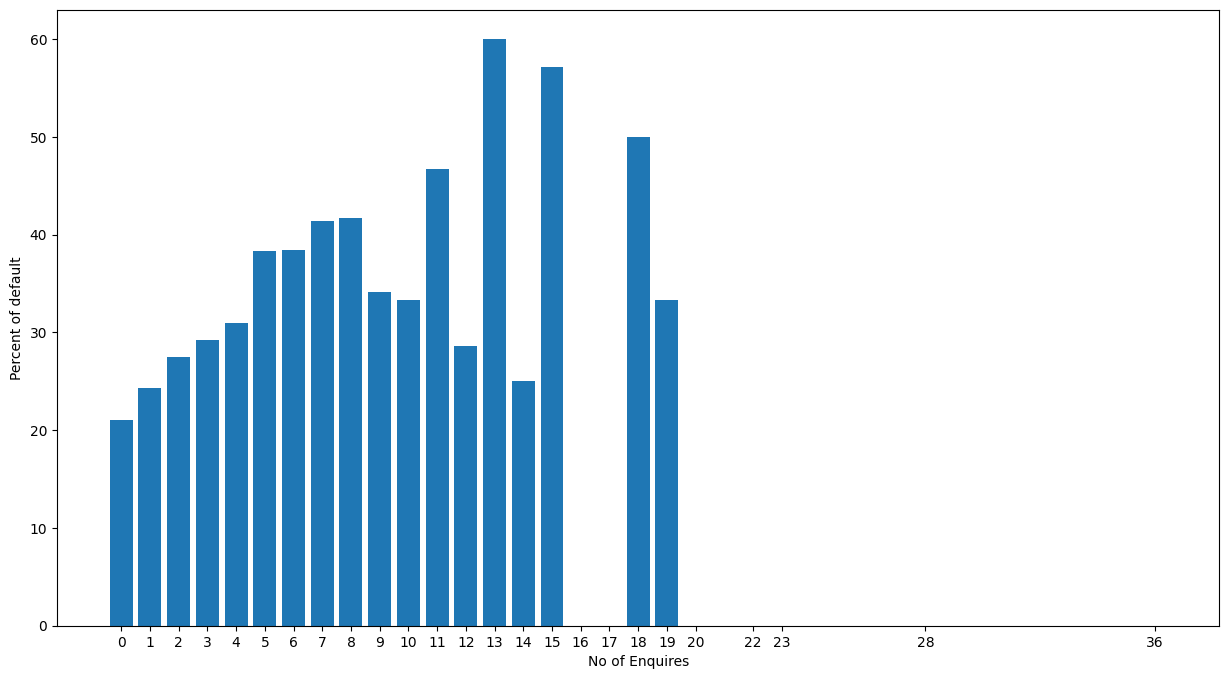

In [99]:
plt.figure(figsize=(15,8))
plt.bar(no_inquiries.index,no_inquiries['pct_default'])
plt.xticks(no_inquiries.index)
plt.xlabel('No of Enquires')
plt.ylabel('Percent of default')
plt.show()

**Feature importances of different numerical features**

In [100]:
df2 = df[['disbursed_amount','asset_cost', 'ltv','perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'age', 'risk']]

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df2,df['loan_default'])

ExtraTreesClassifier()

In [102]:
pd.DataFrame(model.feature_importances_,index=df2.columns,columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False)

Feature_Importances
ltv                                             0.195172
asset_cost                                      0.192035
disbursed_amount                                0.183415
age                                             0.095889
credit_history_length                           0.034950
average_acct_age                                0.033959
primary_instal_amt                              0.033051
perform_cns_score                               0.031433
pri_current_balance                             0.029324
pri_sanctioned_amount                           0.028735
pri_disbursed_amount                            0.028697
pri_no_of_accts                                 0.025696
no_of_inquiries                                 0.018934
pri_active_accts                                0.017639
new_accts_in_last_six_months                    0.013185
risk                                            0.009009
pri_overdue_accts                               0.008640
delinquent_accts_in_last_six_months             0.008380
sec_no_of_accts                                 0.003170
sec_instal_amt                                  0.001705
sec_sanctioned_amount                           0.001520
sec_active_accts                                0.001517
sec_disbursed_amount                            0.001484
sec_current_balance                             0.001435
sec_overdue_accts                               0.001027

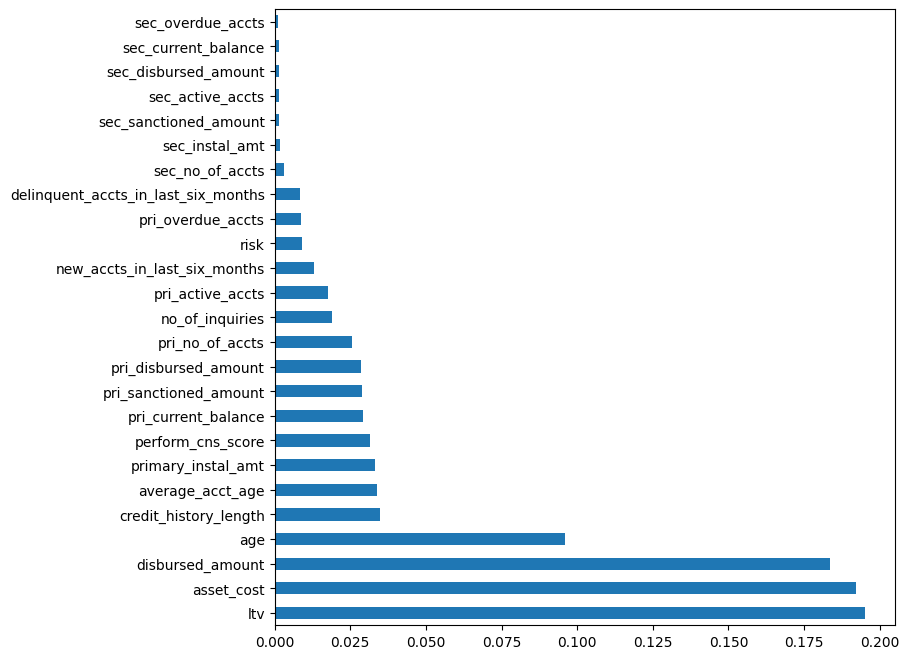

In [103]:
plt.figure(figsize=(8,8))
ranked_features=pd.Series(model.feature_importances_,index=df2.columns)
ranked_features.nlargest(25).plot(kind='barh')
plt.show()

We cannot drop the secondary account details as they are asked by the institutions before granting loan.

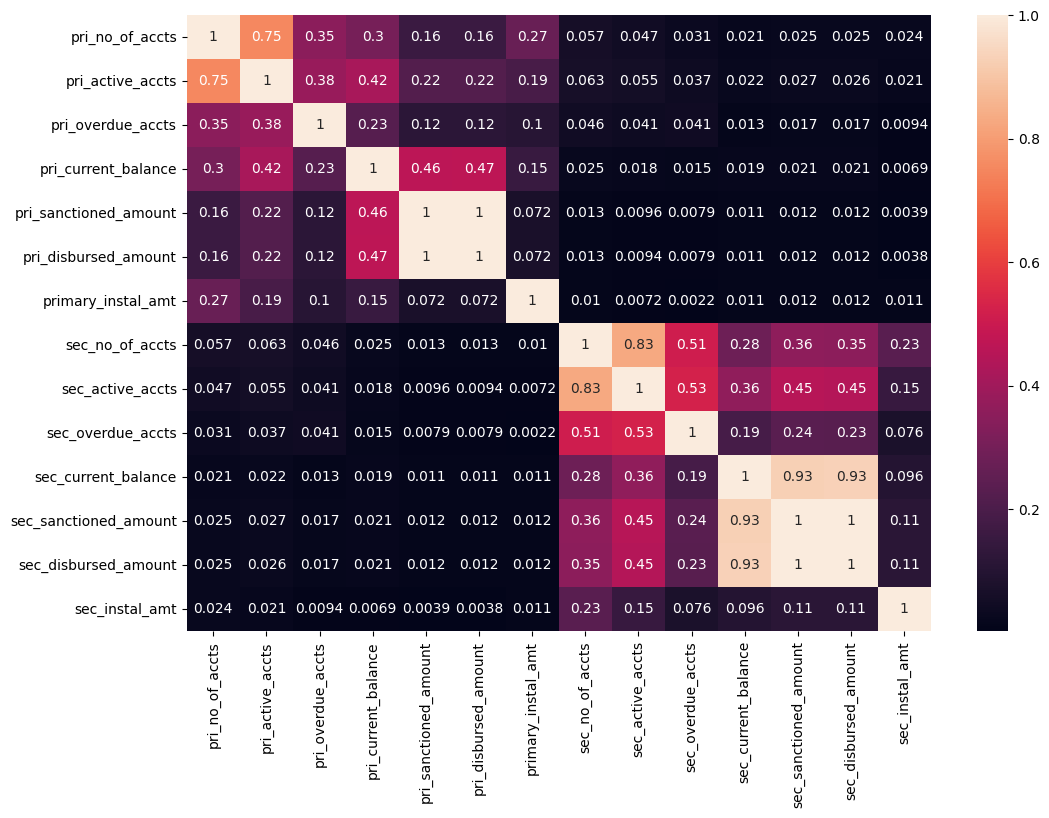

In [104]:
# Checking the correlation between primary and secondary accounts
plt.figure(figsize=(12,8))
sns.heatmap(df[['pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','pri_sanctioned_amount',
               'pri_disbursed_amount','primary_instal_amt','sec_no_of_accts','sec_active_accts','sec_overdue_accts',
               'sec_current_balance','sec_sanctioned_amount','sec_disbursed_amount','sec_instal_amt']].corr(),annot=True)
plt.show()

There is no correlation between primary and secondary accounts

## Primary and Secondary Accounts

In [105]:
# Combining the Primary and Secondary Accounts

df['no_of_accts'] = df['pri_no_of_accts'] + df['sec_no_of_accts']
df['active_accts'] = df['pri_active_accts'] + df['sec_active_accts']
df['overdue_accts'] = df['pri_overdue_accts'] + df['sec_overdue_accts']
df['outstanding_amount'] = df['pri_current_balance'] + df['sec_current_balance']
df['sanctioned_amount'] = df['pri_sanctioned_amount'] + df['sec_sanctioned_amount']
df['psdisbursed_amount'] = df['pri_disbursed_amount'] + df['sec_disbursed_amount']
df['install_amt'] = df['primary_instal_amt'] + df['sec_instal_amt']

In [106]:
df.drop(['pri_no_of_accts','sec_no_of_accts','pri_active_accts','sec_active_accts',
        'pri_overdue_accts','sec_overdue_accts','pri_current_balance','sec_current_balance',
        'pri_sanctioned_amount','sec_sanctioned_amount','pri_disbursed_amount','sec_disbursed_amount',
        'primary_instal_amt','sec_instal_amt'],axis=1,inplace=True)

In [107]:
# Account and amount description

df[['no_of_accts','active_accts','overdue_accts','outstanding_amount','sanctioned_amount','psdisbursed_amount','install_amt']].describe()

no_of_accts   active_accts  overdue_accts  outstanding_amount  \
count  225493.000000  225493.000000  225493.000000        2.254930e+05   
mean        2.522482       1.081980       0.166351        1.740510e+05   
std         5.297041       1.995252       0.569216        9.705526e+05   
min         0.000000       0.000000       0.000000       -6.678296e+06   
25%         0.000000       0.000000       0.000000        0.000000e+00   
50%         1.000000       0.000000       0.000000        0.000000e+00   
75%         3.000000       1.000000       0.000000        3.870600e+04   
max       453.000000     144.000000      25.000000        9.652492e+07   

       sanctioned_amount  psdisbursed_amount   install_amt  
count       2.254930e+05        2.254930e+05  2.254930e+05  
mean        2.295628e+05        2.289809e+05  1.331814e+04  
std         2.421078e+06        2.423976e+06  1.507104e+05  
min         0.000000e+00        0.000000e+00  0.000000e+00  
25%         0.000000e+00        0.000000e+00  0.000000e+00  
50%         0.000000e+00        0.000000e+00  0.000000e+00  
75%         6.800000e+04        6.600000e+04  2.127000e+03  
max         1.000000e+09        1.000000e+09  2.564281e+07

## Total number of accounts

In [108]:
df['no_of_accts'].describe()

count    225493.000000
mean          2.522482
std           5.297041
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         453.000000
Name: no_of_accts, dtype: float64

In [109]:
na_non_default = df[df['loan_default']==0]['no_of_accts']
na_default = df[df['loan_default']==1]['no_of_accts']

In [110]:
pd.DataFrame([na_non_default.describe(), na_default.describe()], index=['non_defaulters','defaulters'])

count      mean       std  min  25%  50%  75%    max
non_defaulters  176526.0  2.624220  5.343009  0.0  0.0  1.0  3.0  354.0
defaulters       48967.0  2.155717  5.111176  0.0  0.0  0.0  2.0  453.0

## Active Accounts

In [111]:
counts = df['active_accts'].value_counts()
percent = df['active_accts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
active_accts                         
0             130135        57.711326
1              41185        18.264425
2              21359         9.472134
3              12203         5.411698
4               7506         3.328706
5               4578         2.030218
6               2836         1.257689
7               1853         0.821755
8               1204         0.533941
9                795         0.352561
10               542         0.240362
11               366         0.162311
12               235         0.104216
13               192         0.085147
14               130         0.057651
15               100         0.044347
16                57         0.025278
17                57         0.025278
18                32         0.014191
19                28         0.012417
20                13         0.005765
21                13         0.005765
23                12         0.005322
24                10         0.004435
22                 9         0.003991
25                 7         0.003104
26                 7         0.003104
28                 6         0.002661
31                 4         0.001774
27                 3         0.001330
34                 3         0.001330
32                 2         0.000887
35                 2         0.000887
37                 2         0.000887
36                 1         0.000443
42                 1         0.000443
144                1         0.000443
65                 1         0.000443
43                 1         0.000443
52                 1         0.000443
39                 1         0.000443

There are over 50 percent inactive accounts. Around 18 percent have 1 active account present

## Overdue Accounts

In [112]:
counts = df['overdue_accts'].value_counts()
percent = df['overdue_accts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
overdue_accts                         
0              198756        88.142869
1               20167         8.943515
2                4429         1.964141
3                1273         0.564541
4                 438         0.194241
5                 179         0.079382
6                 107         0.047452
7                  42         0.018626
8                  29         0.012861
9                  25         0.011087
11                 11         0.004878
12                 10         0.004435
10                  7         0.003104
13                  6         0.002661
14                  5         0.002217
18                  2         0.000887
17                  2         0.000887
23                  1         0.000443
19                  1         0.000443
15                  1         0.000443
16                  1         0.000443
25                  1         0.000443

Most of the accounts are not overdue. Around 9 percent of data contain 1 overdue account, and around 2 percent of data contain 2 overdue accounts

In [113]:
no_inquiries = pd.crosstab(index=df['overdue_accts'], columns=df['loan_default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries

loan_default        0      1  pct_default
overdue_accts                            
0              157027  41729    20.995089
1               14797   5370    26.627659
2                3176   1253    28.290811
3                 895    378    29.693637
4                 310    128    29.223744
5                 124     55    30.726257
6                  83     24    22.429907
7                  35      7    16.666667
8                  22      7    24.137931
9                  21      4    16.000000
10                  6      1    14.285714
11                  9      2    18.181818
12                  6      4    40.000000
13                  4      2    33.333333
14                  4      1    20.000000
15                  1      0     0.000000
16                  0      1   100.000000
17                  2      0     0.000000
18                  1      1    50.000000
19                  1      0     0.000000
23                  1      0     0.000000
25                  1      0     0.000000

Upto 5 overdue accounts, we can see that as the number of overdue accounts increase, the percentage of default also increase. However we do not observe the same pattern/any pattern beyond 5 overdue accounts

## Outstanding Amount

In [114]:
counts = df['outstanding_amount'].value_counts()
percent = df['outstanding_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
outstanding_amount                         
0                   134776        59.769483
400                    121         0.053660
800                    120         0.053217
30000                  100         0.044347
100000                  79         0.035034
...                    ...              ...
469679                   1         0.000443
75268                    1         0.000443
61603                    1         0.000443
35829                    1         0.000443
390443                   1         0.000443

[71171 rows x 2 columns]

Around 60 percent of data do not have any outstanding amount

## Sanctioned Amount

In [115]:
counts = df['sanctioned_amount'].value_counts()
percent = df['sanctioned_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
sanctioned_amount                         
0                  131200        58.183624
50000                1462         0.648357
30000                1405         0.623079
100000                946         0.419525
25000                 937         0.415534
...                   ...              ...
2578340                 1         0.000443
1158009                 1         0.000443
2965039                 1         0.000443
1750692                 1         0.000443
416133                  1         0.000443

[44706 rows x 2 columns]

For around 58 percent of the accounts, no amount was sanctioned for all the loans at the time of disbursement

## Psdisbursed Amount

In [116]:
counts = df['psdisbursed_amount'].value_counts()
percent = df['psdisbursed_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
psdisbursed_amount                         
0                   131306        58.230632
50000                 1361         0.603566
30000                 1301         0.576958
100000                 917         0.406665
40000                  765         0.339257
...                    ...              ...
218696                   1         0.000443
14694                    1         0.000443
243990                   1         0.000443
200971                   1         0.000443
416133                   1         0.000443

[48245 rows x 2 columns]

For 58 percent of all accounts, no amount was disbursed for all the loans at the time of disbursement

## Instalment Amount

In [117]:
counts = df['install_amt'].value_counts()
percent = df['install_amt'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
install_amt                         
0            152606        67.676602
1620            287         0.127277
1500            153         0.067851
1600            140         0.062086
2000            139         0.061643
...             ...              ...
26755             1         0.000443
8542              1         0.000443
23407             1         0.000443
16789             1         0.000443
23356             1         0.000443

[28074 rows x 2 columns]

Around 68 percent of data do not have any installment amount to pay

In [118]:
df3 = df[['disbursed_amount', 'asset_cost', 'ltv','perform_cns_score', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries',
       'age', 'risk', 'no_of_accts', 'active_accts',
       'overdue_accts', 'outstanding_amount', 'sanctioned_amount',
       'psdisbursed_amount', 'install_amt']]

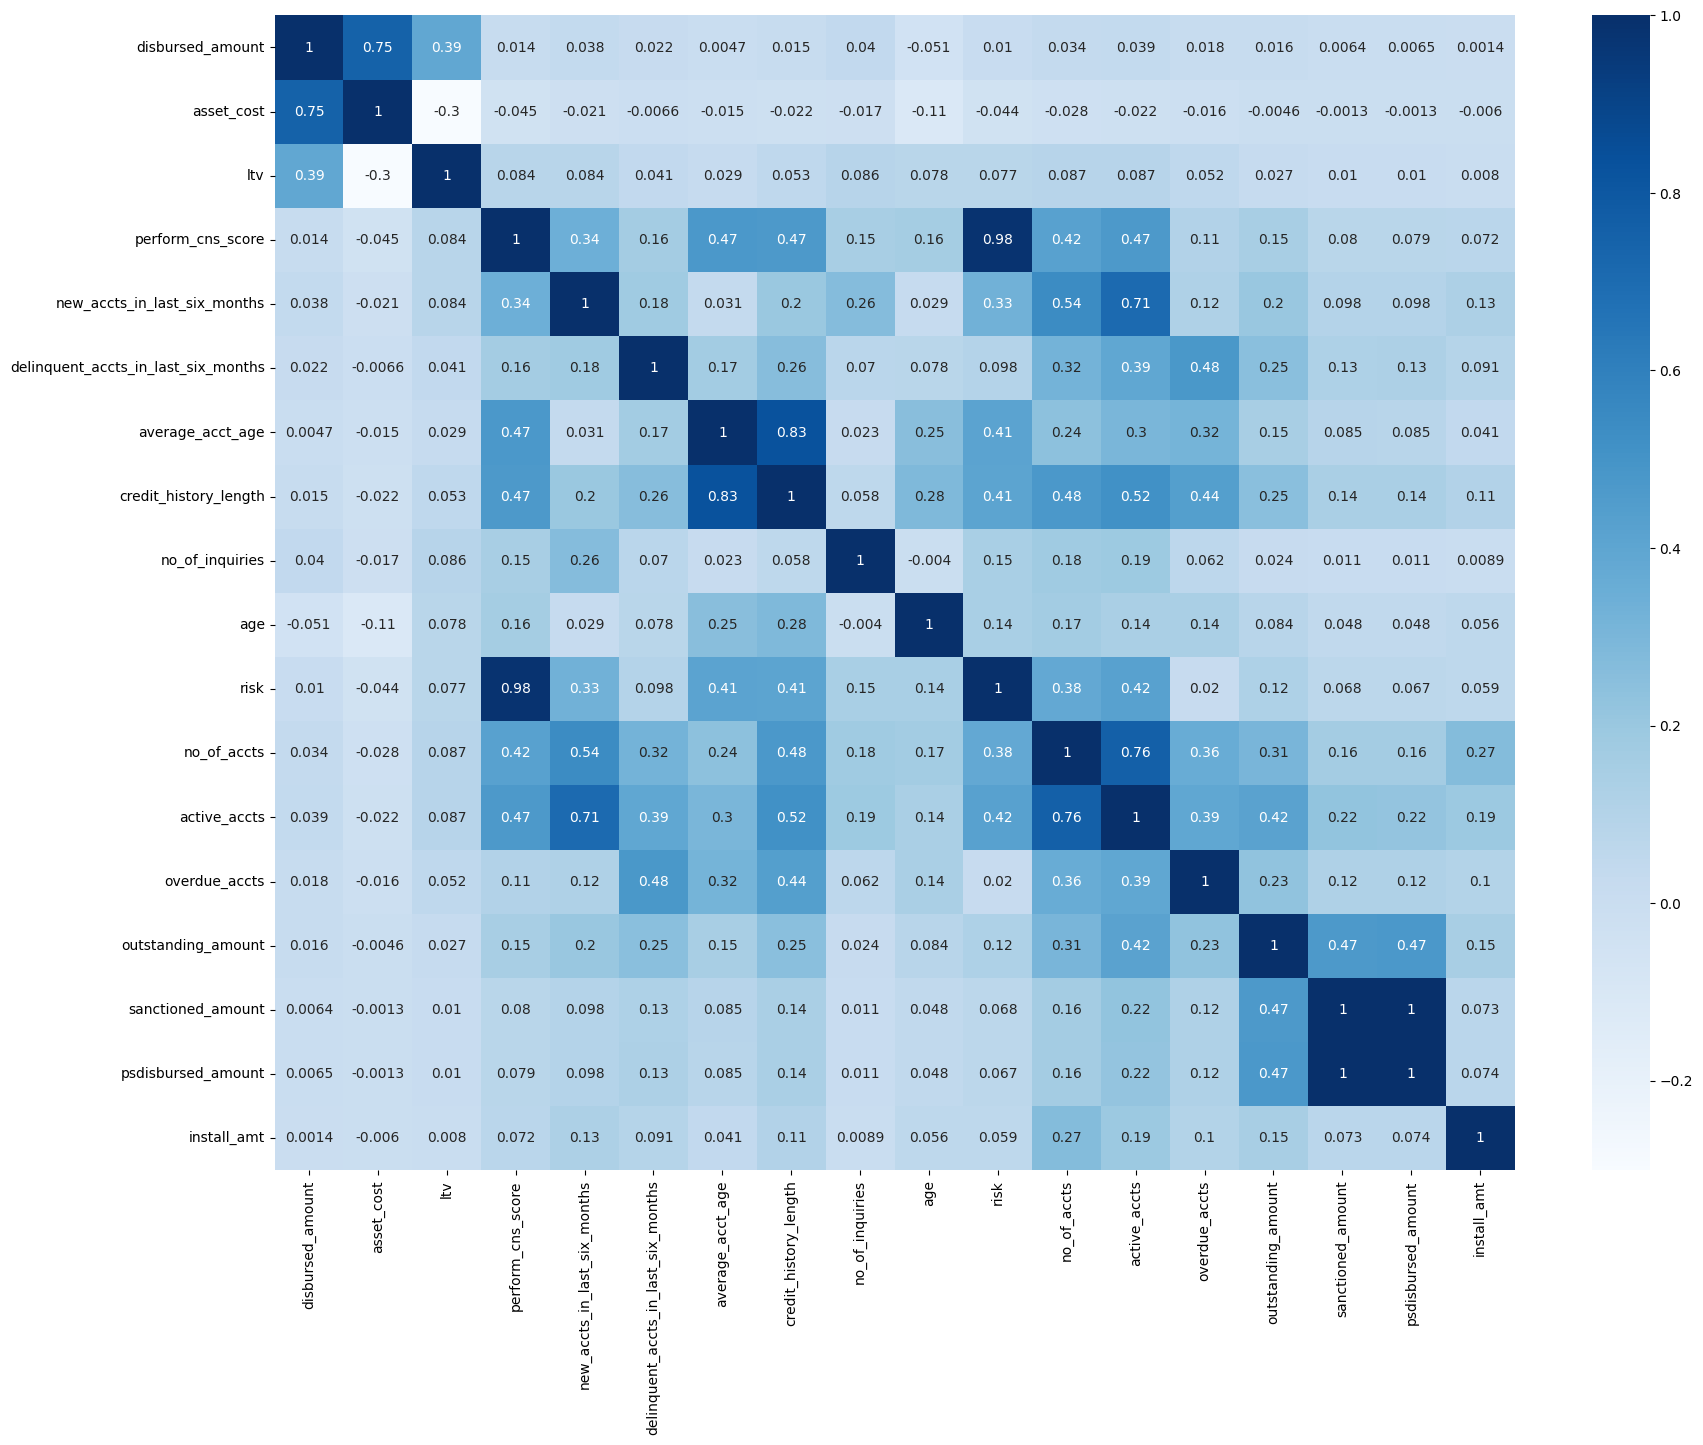

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,cmap='Blues')
plt.show()

From the above correlation heatmap, we can see that some of the features are highly correlated(>0.75) with each other.
* --- disbursed amount and asset cost - 0.75
* --- perform_cns.score and risk - 0.98
* --- average_acct_age and credit_history_length - 0.83
* --- no_of_accts and active_accts - 0.76
* --- sanctioned_amount and psdisbursed_amount - 1

**Feature importances of above numerical features**

In [120]:
# Feature importance using Extra Trees classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df3,df['loan_default'])

ExtraTreesClassifier()

In [121]:
pd.DataFrame(model.feature_importances_,index=df3.columns,columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False)

Feature_Importances
ltv                                             0.194756
asset_cost                                      0.191891
disbursed_amount                                0.183175
age                                             0.099887
credit_history_length                           0.035629
average_acct_age                                0.034659
install_amt                                     0.033945
perform_cns_score                               0.031954
outstanding_amount                              0.030300
sanctioned_amount                               0.029429
psdisbursed_amount                              0.029388
no_of_accts                                     0.026811
no_of_inquiries                                 0.018990
active_accts                                    0.018513
new_accts_in_last_six_months                    0.013732
overdue_accts                                   0.009313
delinquent_accts_in_last_six_months             0.008838
risk                                            0.008789

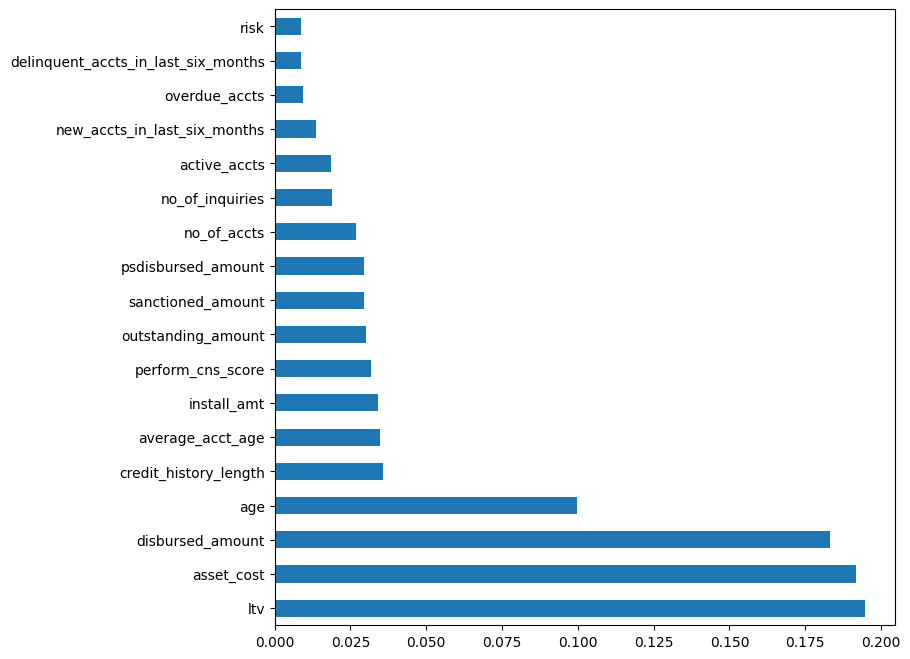

In [122]:
plt.figure(figsize=(8,8))
ranked_features=pd.Series(model.feature_importances_,index=df3.columns)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [123]:
df.drop(['asset_cost','perform_cns_score','average_acct_age','no_of_accts','psdisbursed_amount','delinquent_accts_in_last_six_months'],axis=1,inplace=True)

In [124]:
df.head()

disbursed_amount    ltv  aadhar_flag  voterid_flag  \
0             50578  89.55            1             0   
1             47145  73.23            1             0   
2             53278  89.63            1             0   
3             57513  88.48            1             0   
4             52378  88.39            1             0   

   new_accts_in_last_six_months  credit_history_length  no_of_inquiries  \
0                             0                      0                0   
1                             0                     23                0   
2                             0                      0                0   
3                             0                     15                1   
4                             0                      0                1   

   loan_default  self_employed  age  risk  active_accts  overdue_accts  \
0             0          False   34    -1             0              0   
1             1           True   33     2             1              1   
2             0           True   33    -1             0              0   
3             1           True   25     0             0              0   
4             1           True   41    -1             0              0   

   outstanding_amount  sanctioned_amount  install_amt  
0                   0                  0            0  
1               27600              50200         1991  
2                   0                  0            0  
3                   0                  0           31  
4                   0                  0            0

In [125]:
df.shape

(225493, 16)

In [126]:
df.columns

Index(['disbursed_amount', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'credit_history_length',
       'no_of_inquiries', 'loan_default', 'self_employed', 'age', 'risk',
       'active_accts', 'overdue_accts', 'outstanding_amount',
       'sanctioned_amount', 'install_amt'],
      dtype='object')

## Checking and Handling outliers

In [127]:
df12 = df[['disbursed_amount', 'ltv',
       'new_accts_in_last_six_months',
       'credit_history_length', 'no_of_inquiries',
       'age', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt']]

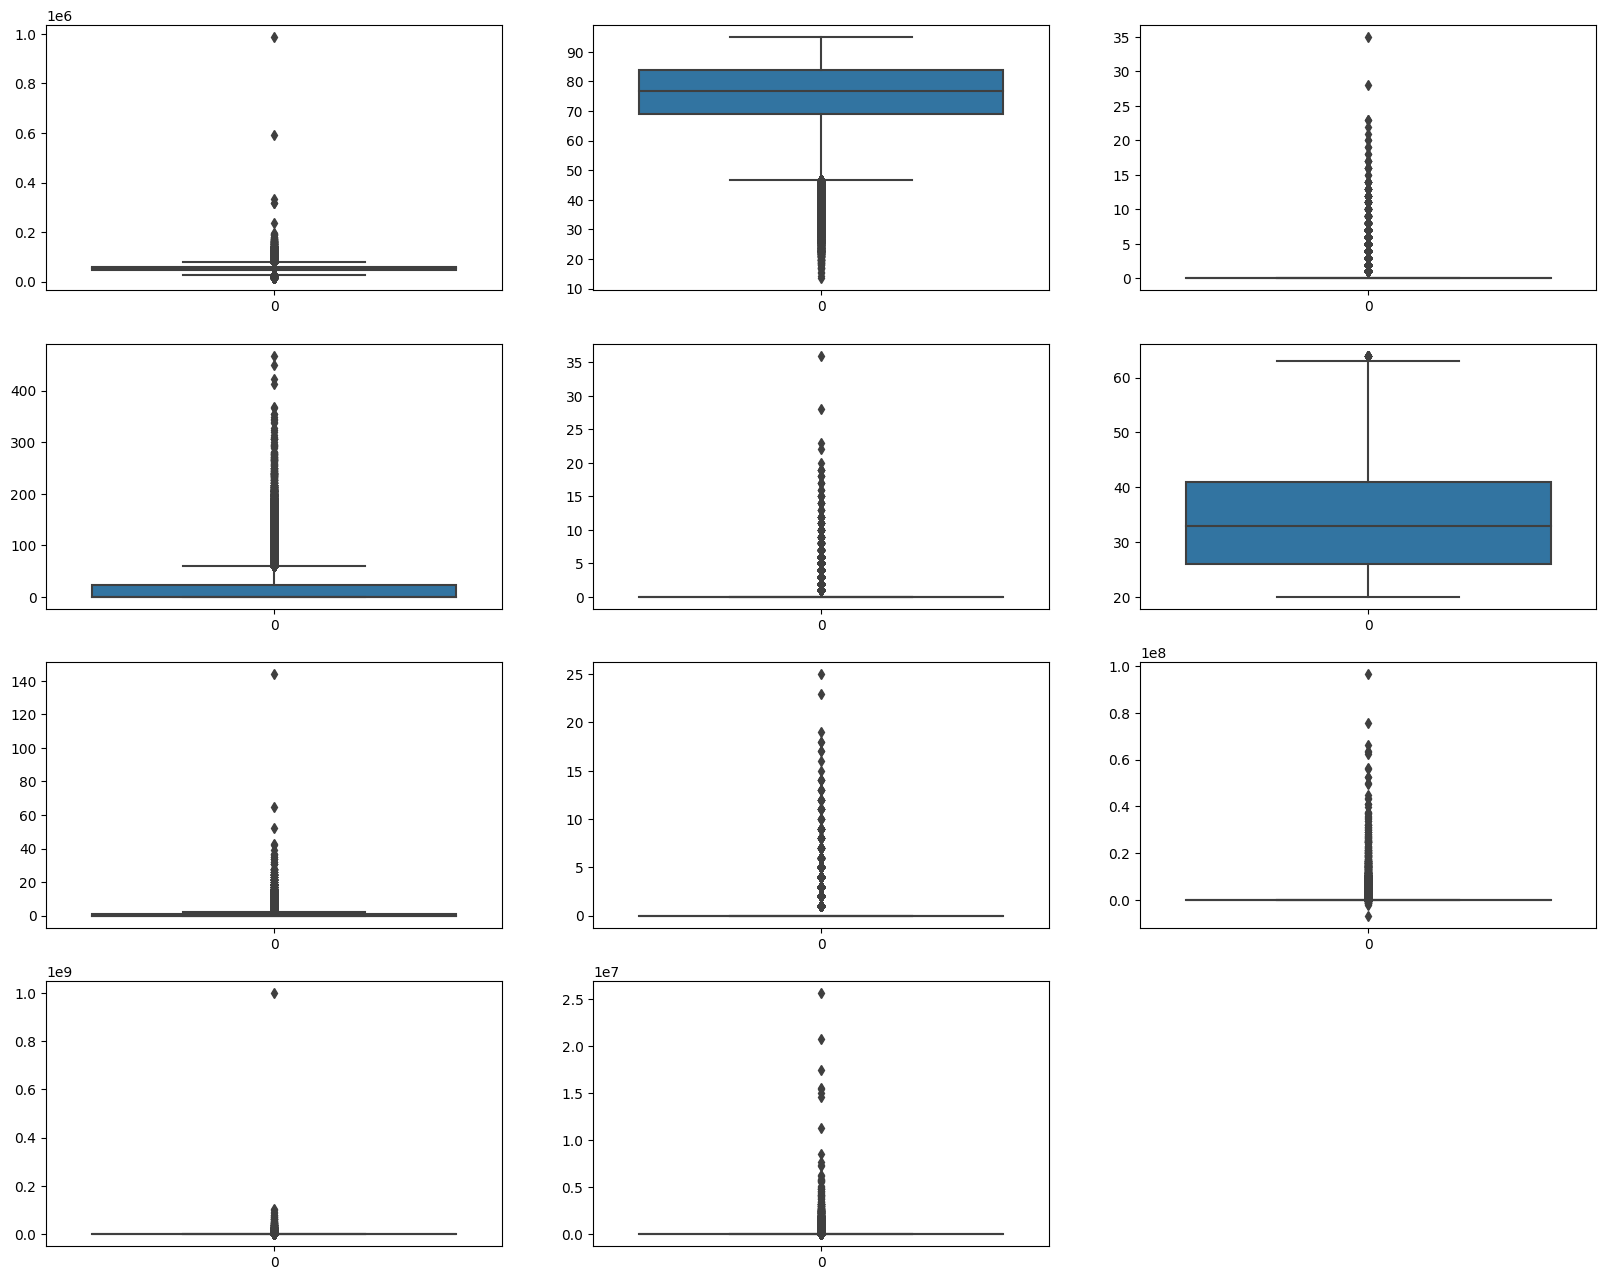

In [128]:
plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

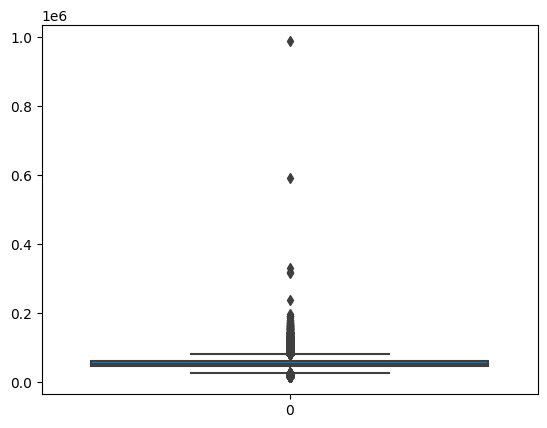

In [129]:
sns.boxplot(df['disbursed_amount'])
plt.show()

In [130]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['disbursed_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 13320
10 percentile value is 39641
20 percentile value is 45150
30 percentile value is 48518
40 percentile value is 51303
50 percentile value is 53703
60 percentile value is 56040
70 percentile value is 58693
80 percentile value is 62213
90 percentile value is 68817
100 percentile value is  987354


In [131]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['disbursed_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 68817
91 percentile value is 69817
92 percentile value is 70817
93 percentile value is 71817
94 percentile value is 72817
95 percentile value is 73817
96 percentile value is 76751
97 percentile value is 80386
98 percentile value is 85120
99 percentile value is 95311
100 percentile value is  987354


In [132]:
df = df[df['disbursed_amount']<max(df['disbursed_amount'])]

In [133]:
df = df[df['new_accts_in_last_six_months']<25]
df = df[df['credit_history_length']<400]
df = df[df['no_of_inquiries']<25]
df = df[df['active_accts']<50]
df = df[df['sanctioned_amount']<max(df['sanctioned_amount'])]

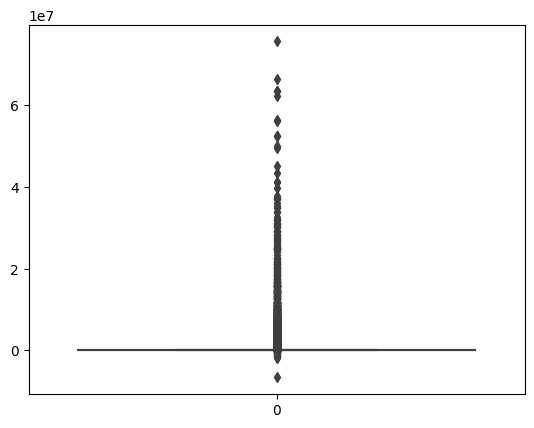

In [134]:
sns.boxplot(df['outstanding_amount'])
plt.show()

In [135]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['outstanding_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -6678296
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 19134
80 percentile value is 68825
90 percentile value is 325638
100 percentile value is  75603400


In [136]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['outstanding_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 325638
91 percentile value is 389548
92 percentile value is 462968
93 percentile value is 553057
94 percentile value is 680710
95 percentile value is 848088
96 percentile value is 1071188
97 percentile value is 1411553
98 percentile value is 1929418
99 percentile value is 3012107
100 percentile value is  75603400


In [137]:
df = df[(df['outstanding_amount']>-6678296) & (df['outstanding_amount']<75603400)]

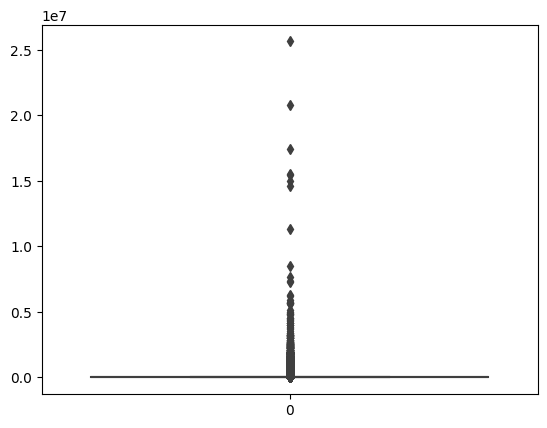

In [138]:
sns.boxplot(df['install_amt'])
plt.show()

In [139]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['install_amt'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 1300
80 percentile value is 3565
90 percentile value is 11940
100 percentile value is  25642806


In [140]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['install_amt'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 11940
91 percentile value is 13602
92 percentile value is 15706
93 percentile value is 18345
94 percentile value is 21952
95 percentile value is 27296
96 percentile value is 36482
97 percentile value is 57000
98 percentile value is 109176
99 percentile value is 260614
100 percentile value is  25642806


In [141]:
df = df[df['install_amt']<10000000]

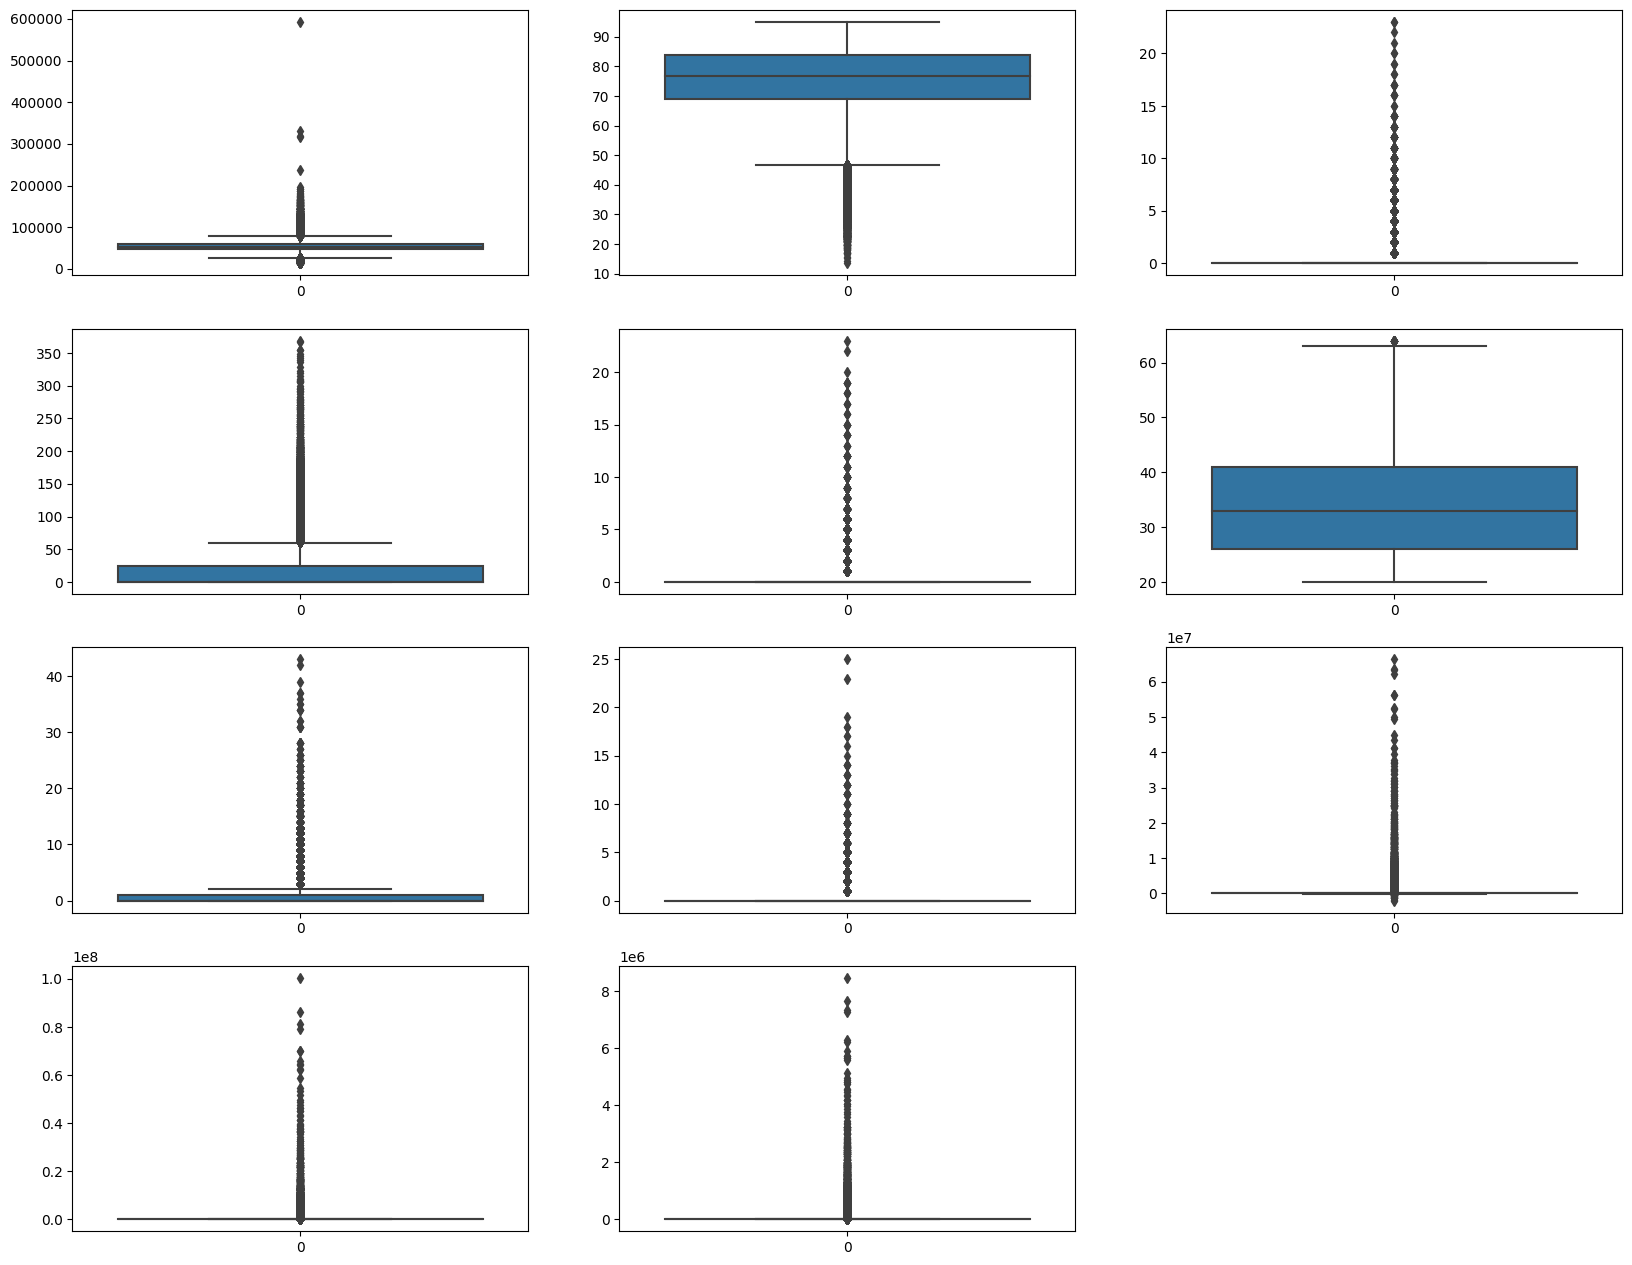

In [142]:
# Checking the distributions again

plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=13:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [143]:
# Removing few more outliers/extreme values

df = df[df['disbursed_amount']<250000]
df = df[df['outstanding_amount']<40000000]
df = df[df['sanctioned_amount']<0.800000e+08]
df = df[df['install_amt']<=5.000000e+06]

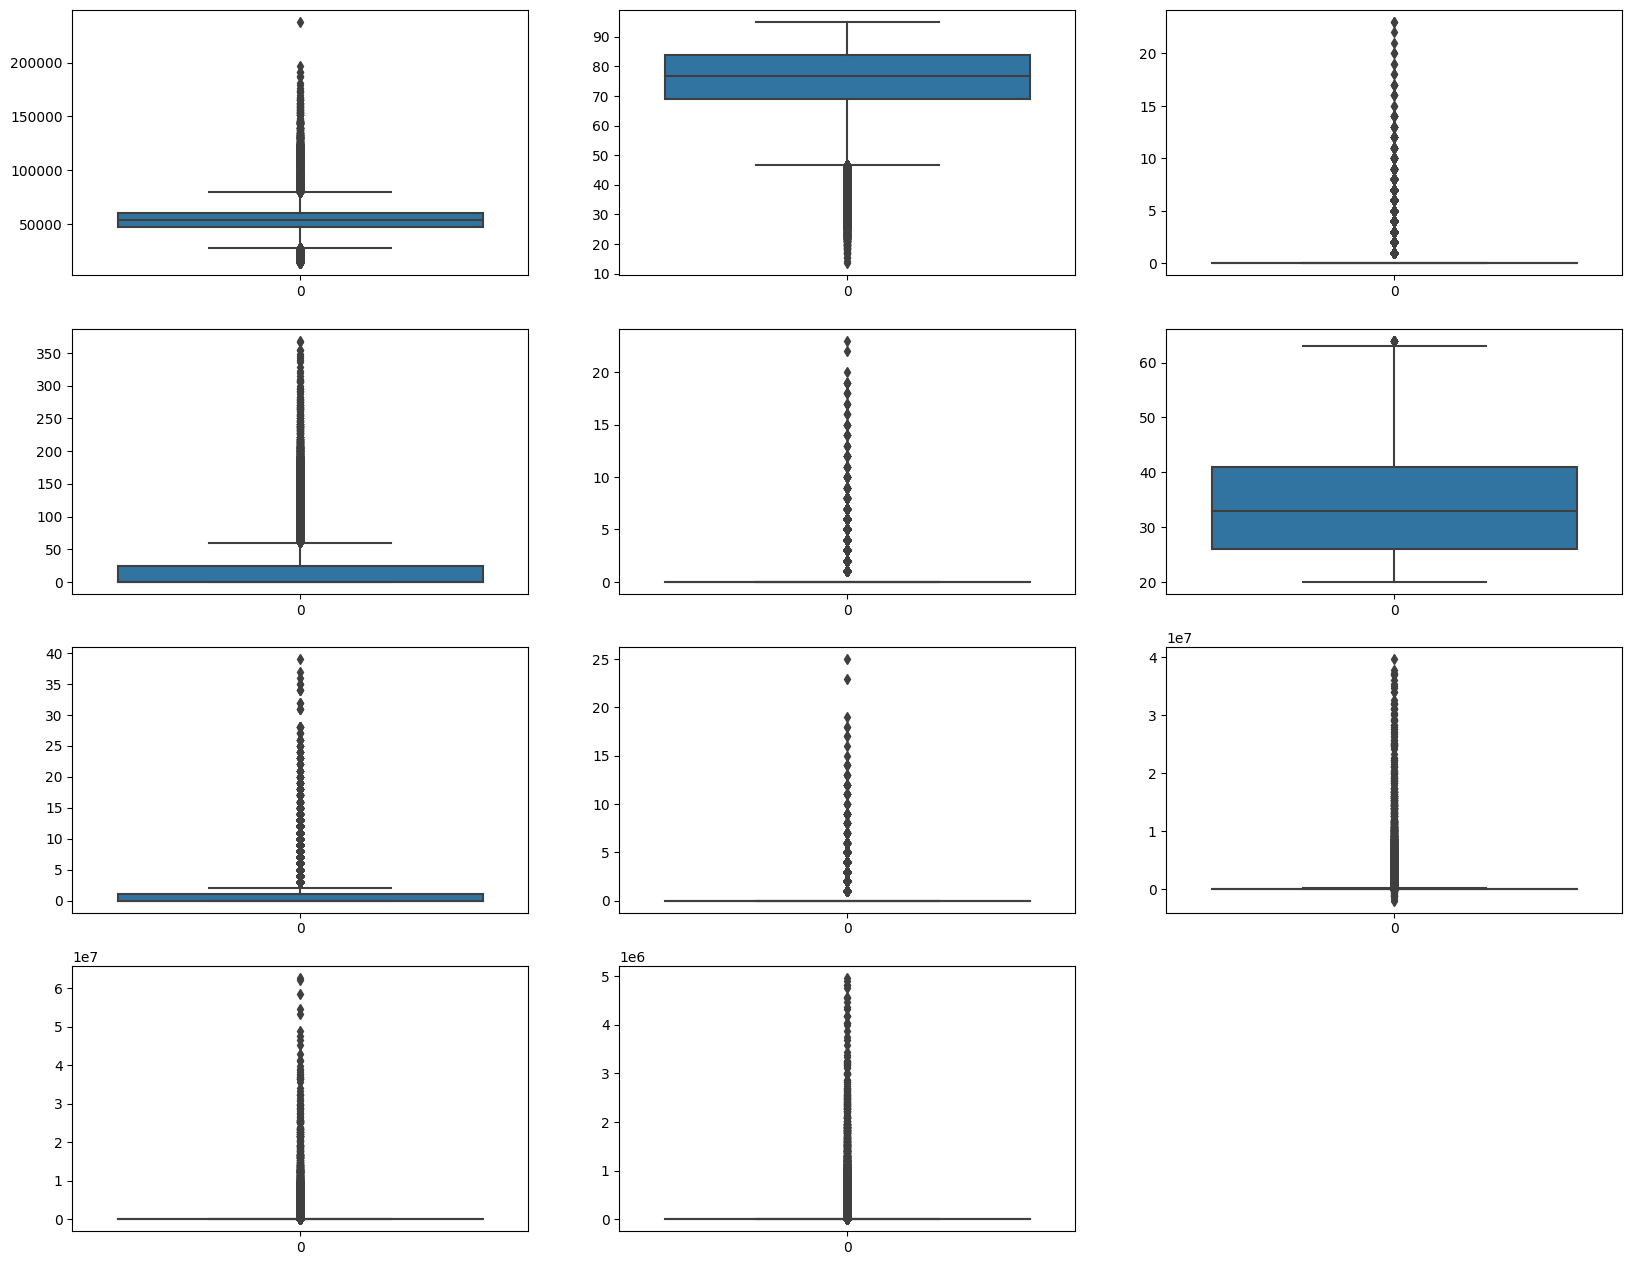

In [144]:
plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

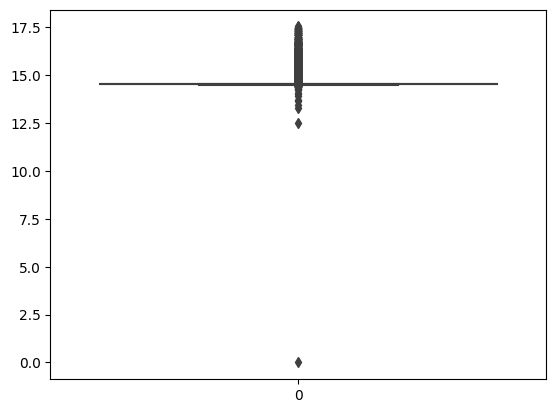

In [145]:
# Transforming the features outstanding amount, sanctioned amount and install_amt
df['log_outstanding_amount'] = np.log(df['outstanding_amount']+1-min(df['outstanding_amount']))
sns.boxplot(df['log_outstanding_amount'])
plt.show()

In [147]:
df['log_outstanding_amount'].describe()

count    225439.000000
mean         14.572138
std           0.181122
min           0.000000
25%          14.515495
50%          14.515495
75%          14.534502
max          17.544459
Name: log_outstanding_amount, dtype: float64

In [149]:
df.isnull().sum()

disbursed_amount                0
ltv                             0
aadhar_flag                     0
voterid_flag                    0
new_accts_in_last_six_months    0
credit_history_length           0
no_of_inquiries                 0
loan_default                    0
self_employed                   0
age                             0
risk                            0
active_accts                    0
overdue_accts                   0
outstanding_amount              0
sanctioned_amount               0
install_amt                     0
log_outstanding_amount          0
dtype: int64

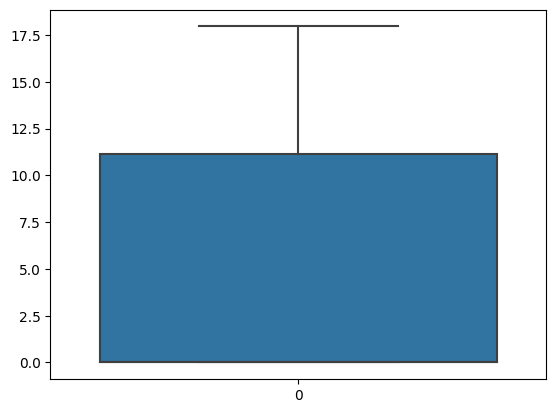

In [151]:
df['log_sanctioned_amount'] = np.log(df['sanctioned_amount']+1)
sns.boxplot(df['log_sanctioned_amount'])
plt.show()

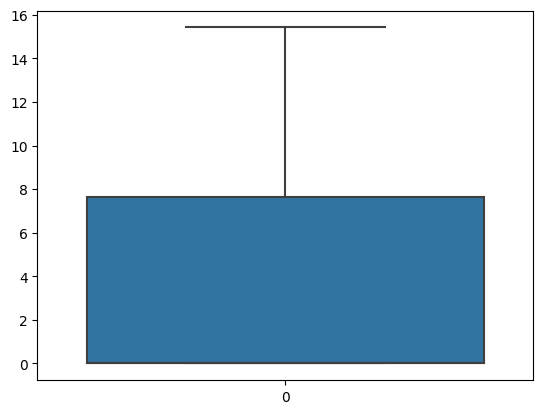

In [152]:
df['log_install_amt'] = np.log(df['install_amt']+1)
sns.boxplot(df['log_install_amt'])
plt.show()

In [153]:
df.drop(['outstanding_amount','sanctioned_amount','install_amt'],axis=1,inplace=True)

In [154]:
df.shape

(225439, 16)

In [155]:
df.columns

Index(['disbursed_amount', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'credit_history_length',
       'no_of_inquiries', 'loan_default', 'self_employed', 'age', 'risk',
       'active_accts', 'overdue_accts', 'log_outstanding_amount',
       'log_sanctioned_amount', 'log_install_amt'],
      dtype='object')

**Pairplot**

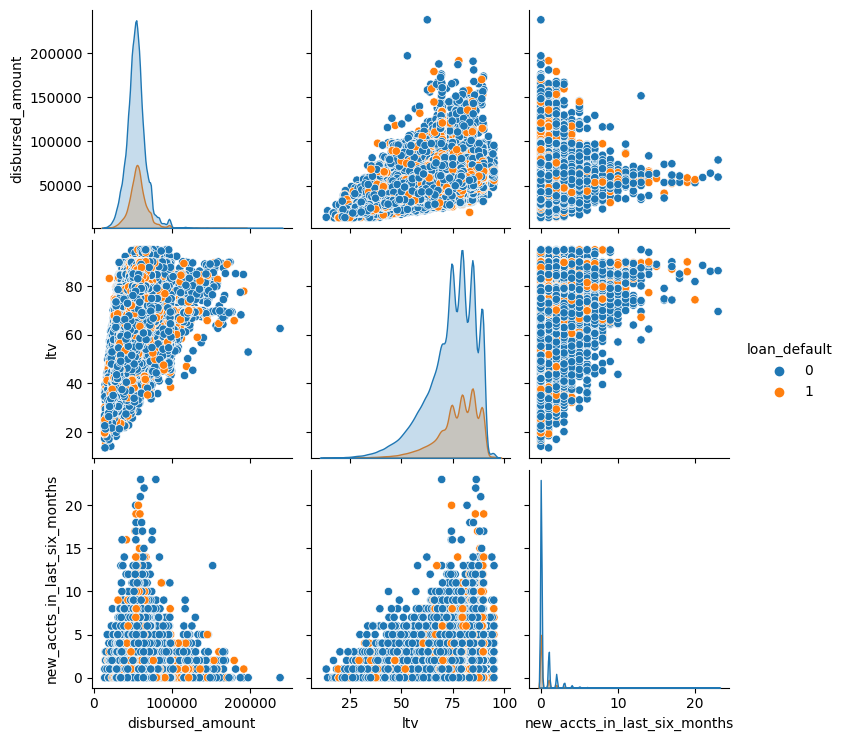

In [156]:
n = df.shape[0]
sns.pairplot(df[['disbursed_amount', 'ltv','new_accts_in_last_six_months', 
                 'loan_default']][0:n], hue='loan_default', 
             vars=['disbursed_amount', 'ltv','new_accts_in_last_six_months'])
plt.show()

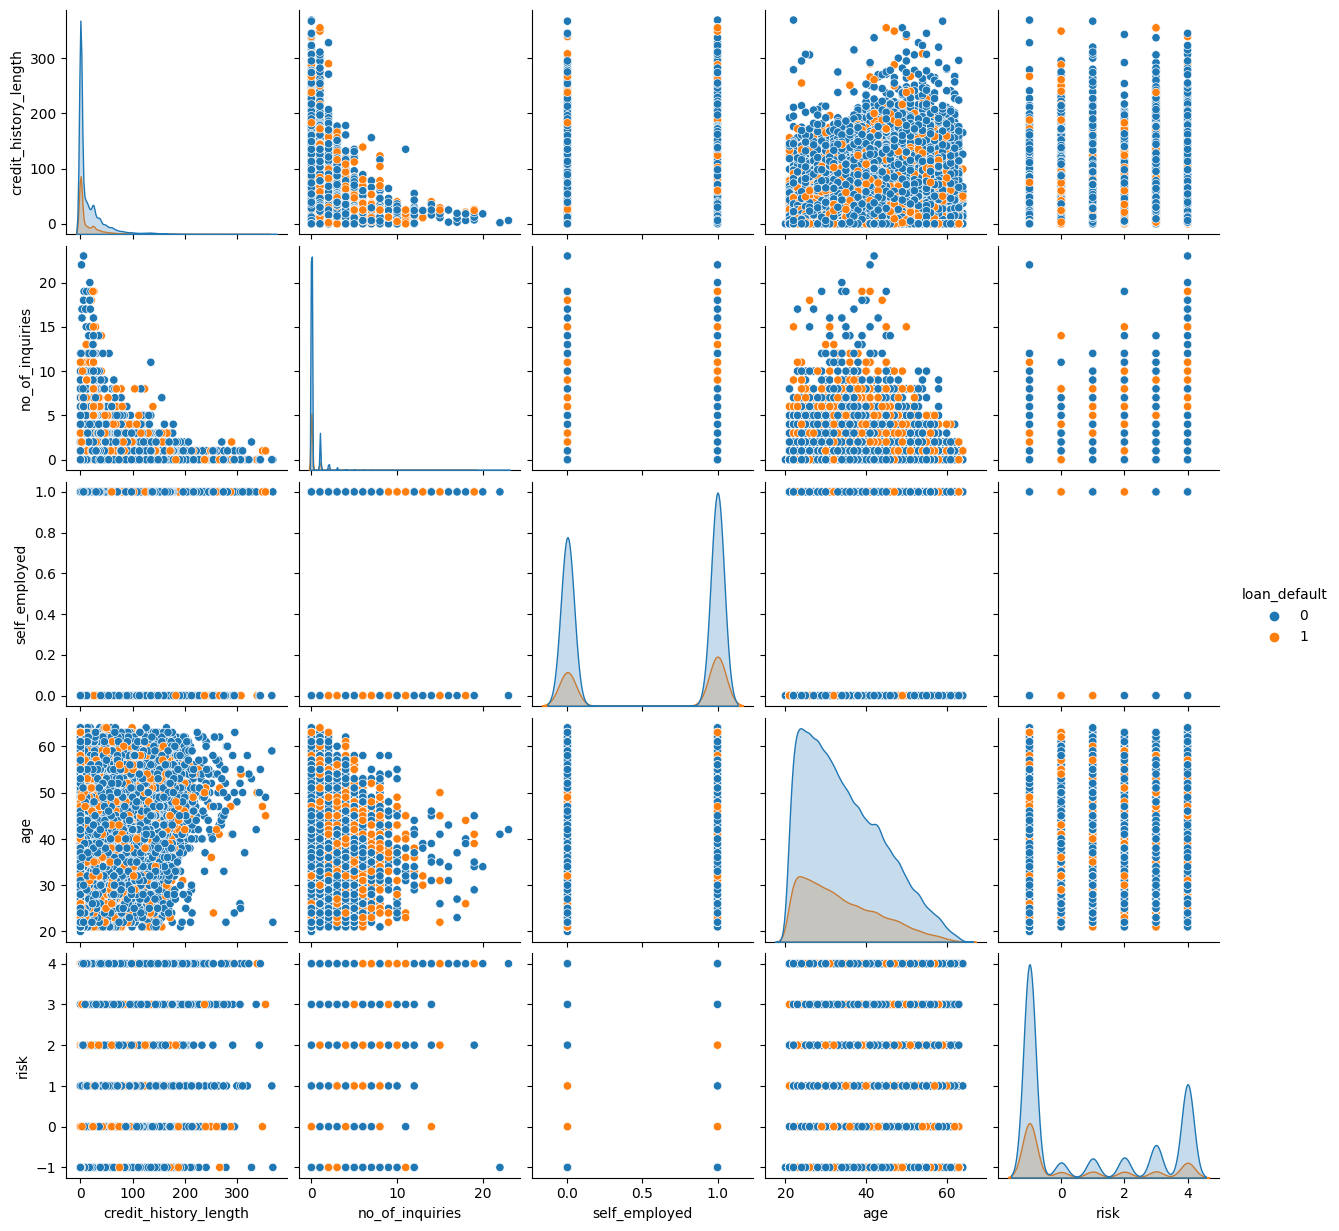

In [157]:
n = df.shape[0]
sns.pairplot(df[['credit_history_length', 'no_of_inquiries',
       'self_employed', 'age', 'risk','loan_default']][0:n], hue='loan_default', 
             vars=['credit_history_length', 'no_of_inquiries',
       'self_employed', 'age', 'risk'])
plt.show()

In [160]:
df.columns

Index(['disbursed_amount', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'credit_history_length',
       'no_of_inquiries', 'loan_default', 'self_employed', 'age', 'risk',
       'active_accts', 'overdue_accts', 'log_outstanding_amount',
       'log_sanctioned_amount', 'log_install_amt'],
      dtype='object')

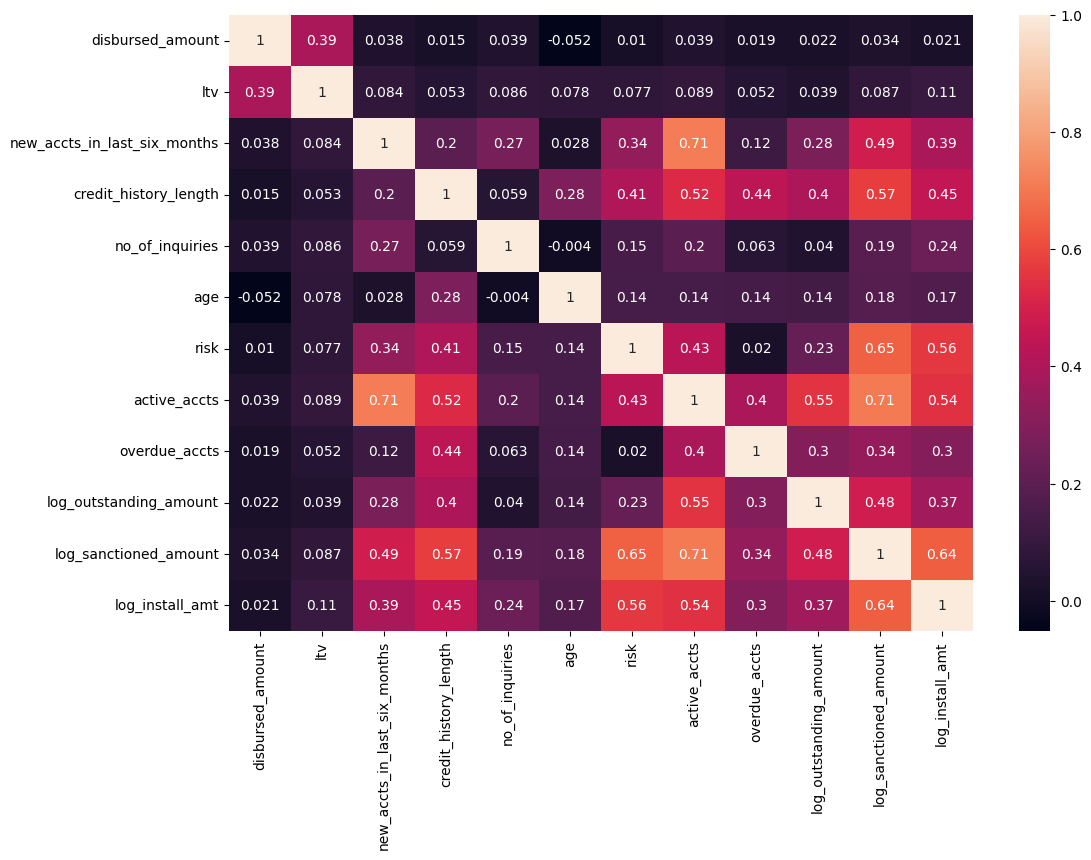

In [161]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['disbursed_amount', 'ltv','new_accts_in_last_six_months','credit_history_length','no_of_inquiries',
               'age','risk','active_accts', 'overdue_accts', 'log_outstanding_amount','log_sanctioned_amount', 
                'log_install_amt']].corr(),annot=True)
plt.show()

There is a correlation of 1 between disbursed amount and log_outstanding_amount. Hence removing the log_outstanding_amount feature after comparing the feature importances

In [162]:
df.drop('log_outstanding_amount',axis=1,inplace=True)

In [163]:
df.shape

(225439, 15)

In [164]:
df.columns

Index(['disbursed_amount', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'credit_history_length',
       'no_of_inquiries', 'loan_default', 'self_employed', 'age', 'risk',
       'active_accts', 'overdue_accts', 'log_sanctioned_amount',
       'log_install_amt'],
      dtype='object')

# Modelling

## Logistic Regression

In [165]:
y = df['loan_default']
X = df.drop('loan_default',axis=1)

In [166]:
y = list(y)

In [167]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xscaled = sc.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled,columns=X.columns)

In [168]:
import statsmodels.api as sm
Xc = sm.add_constant(Xscaled)
model = sm.Logit(y, Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.508019
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               225439
Model:                          Logit   Df Residuals:                   225424
Method:                           MLE   Df Model:                           14
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                 0.02921
Time:                        10:43:33   Log-Likelihood:            -1.1453e+05
converged:                       True   LL-Null:                   -1.1797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.3385      0.005   -249.358      0.000      -1.349      -1.328
disbursed_amount                 0.1136      0.006     20.335      0.000       0.103       0.125
ltv                              0.2642      0.006     42.466      0.000       0.252       0.276
aadhar_flag                     -0.0532      0.010     -5.158      0.000      -0.073      -0.033
voterid_flag                     0.0643      0.010      6.281      0.000       0.044       0.084
new_accts_in_last_six_months    -0.0146      0.009     -1.649      0.099      -0.032       0.003
credit_history_length           -0.0981      0.008    -12.275      0.000      -0.114      -0.082
no_of_inquiries                  0.1005      0.005     20.168      0.000       0.091       0.110
self_employed                    0.0892      0.005     16.774      0.000       0.079       0.100
age                             -0.0884      0.006    -15.874      0.000      -0.099      -0.077
risk                            -0.1717      0.008    -22.009      0.000      -0.187      -0.156
active_accts                    -0.1748      0.012    -15.006      0.000      -0.198      -0.152
overdue_accts                    0.1476      0.006     23.620      0.000       0.135       0.160
log_sanctioned_amount            0.0628      0.010      6.492      0.000       0.044       0.082
log_install_amt                  0.0855      0.008     11.112      0.000       0.070       0.101
================================================================================================
"""

In [169]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score

In [170]:
y_pred = model.predict(Xc)
prob = pd.DataFrame(y_pred, columns=['probability'])
prob['loan_default'] = y
prob['y_est'] = prob['probability'].apply(lambda x: 0 if x<0.5 else 1)
prob.head()

probability  loan_default  y_est
0     0.256577             0      0
1     0.237868             1      0
2     0.299746             0      0
3     0.335663             1      0
4     0.306713             1      0

In [171]:
# Confusion matrix
confusion_matrix(prob['loan_default'], prob['y_est'])

array([[176253,    227],
       [ 48816,    143]], dtype=int64)

In [172]:
# AUC score
roc_auc_score(prob['loan_default'],prob['probability'])

0.6213619268376113

In [173]:
# Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(Xscaled.values,i) for i in range(X.shape[1])]
pd.DataFrame(vf,index=X.columns,columns=['vif'])

vif
disbursed_amount              1.200578
ltv                           1.245037
aadhar_flag                   4.091754
voterid_flag                  4.082959
new_accts_in_last_six_months  2.410609
credit_history_length         1.929887
no_of_inquiries               1.114457
self_employed                 1.033547
age                           1.120980
risk                          2.101814
active_accts                  3.792978
overdue_accts                 1.511906
log_sanctioned_amount         3.250373
log_install_amt               1.989617

In [174]:
# Building sklearn Linear Regression model
y = df['loan_default']
X = df.drop('loan_default',axis=1)

In [175]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=120)

In [177]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [178]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)

In [179]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.6205078023602968
The test AUC score is: 0.6234701291911117


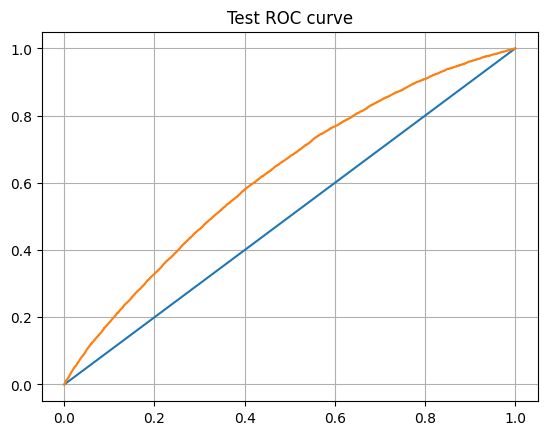

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [181]:
confusion_matrix(y_test,y_test_pred)

array([[52822,    72],
       [14691,    47]], dtype=int64)

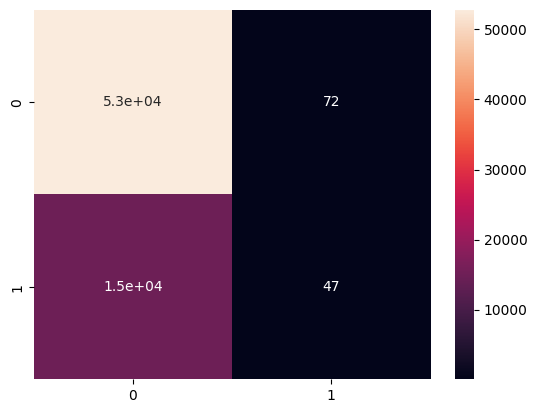

In [182]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [183]:
# FNs are too high, TPs are too low. Maybe Applying SMOTE and balancing the data might help.
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     52894
           1       0.39      0.00      0.01     14738

    accuracy                           0.78     67632
   macro avg       0.59      0.50      0.44     67632
weighted avg       0.70      0.78      0.69     67632



In [184]:
# For 1s the f1 score is really low

# Before computing the binary log loss, we need to perform caliberation

# https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html

from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(cv=3,
                       estimator=LogisticRegression(random_state=42,
                                                    solver='liblinear'),
                       method='isotonic')

In [185]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [186]:
log_loss(y_test,isotonic_predict_prob_test)

0.5090486726165505

**Using SMOTE to handle imbalance**

In [187]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
X_train_sm.shape, y_train_sm.shape

((247172, 14), (247172,))

In [188]:
lr1 = LogisticRegression(solver='liblinear',random_state=42)
lr1.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=42, solver='liblinear')

In [189]:
y_train_pred = lr1.predict(X_train_sm)
y_test_pred = lr1.predict(X_test)
y_train_prob = lr1.predict_proba(X_train_sm)
y_test_prob = lr1.predict_proba(X_test)

In [190]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.6229930138990919
The test AUC score is: 0.6236012288866941


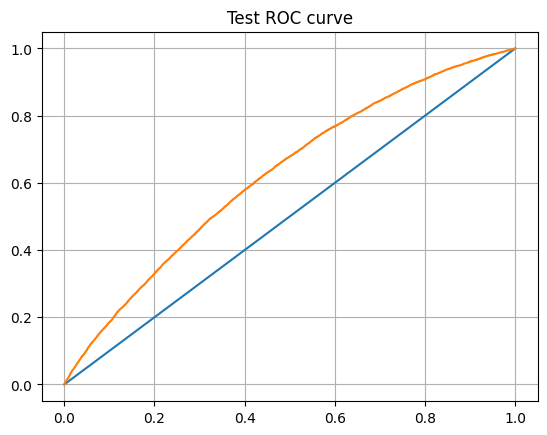

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [192]:
confusion_matrix(y_test,y_test_pred)

array([[28471, 24423],
       [ 5292,  9446]], dtype=int64)

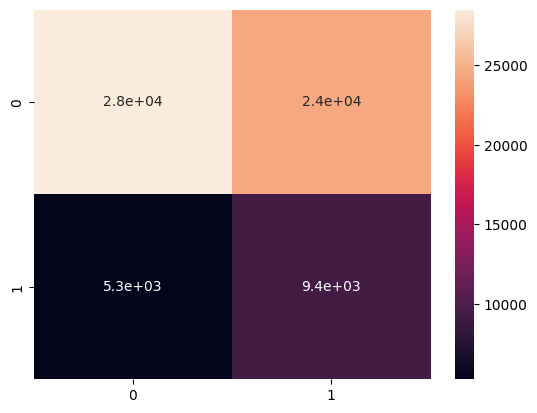

In [193]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [194]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.84      0.54      0.66     52894
           1       0.28      0.64      0.39     14738

    accuracy                           0.56     67632
   macro avg       0.56      0.59      0.52     67632
weighted avg       0.72      0.56      0.60     67632



## Random Forest Classifier

### Modelling without SMOTE

Hyperparameter tuning is done using Random Search CV and best parameters are obtained and used for the modelling

In [198]:
rsearch1_best_params = {'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 374}

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(**rsearch1_best_params, random_state=300)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=11,
                       n_estimators=374, random_state=300)

In [200]:
y_train_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)
y_train_prob = rfc1.predict_proba(X_train)
y_test_prob = rfc1.predict_proba(X_test)

In [201]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.72797822612477
The test AUC score is: 0.6378162918216034


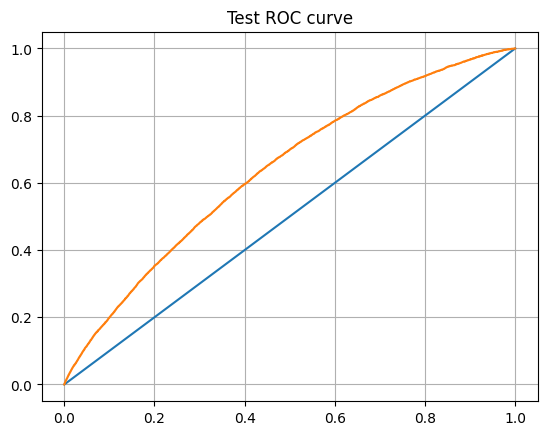

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [203]:
confusion_matrix(y_test,y_test_pred)

array([[52887,     7],
       [14729,     9]], dtype=int64)

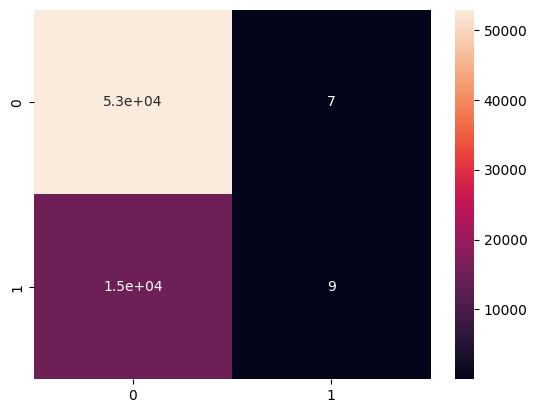

In [204]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [205]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     52894
           1       0.56      0.00      0.00     14738

    accuracy                           0.78     67632
   macro avg       0.67      0.50      0.44     67632
weighted avg       0.73      0.78      0.69     67632



### Modelling with SMOTE

In [207]:
rsearch_best_params = {'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 317}

In [208]:
rfc = RandomForestClassifier(**rsearch_best_params, random_state=300)
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=317, random_state=300)

In [209]:
y_train_pred = rfc.predict(X_train_sm)
y_test_pred = rfc.predict(X_test)
y_train_prob = rfc.predict_proba(X_train_sm)
y_test_prob = rfc.predict_proba(X_test)

In [210]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8573784769605264
The test AUC score is: 0.6251245061630109


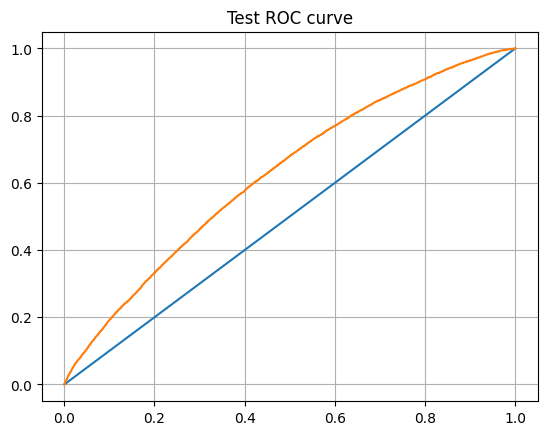

In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [212]:
confusion_matrix(y_test,y_test_pred)

array([[34647, 18247],
       [ 7120,  7618]], dtype=int64)

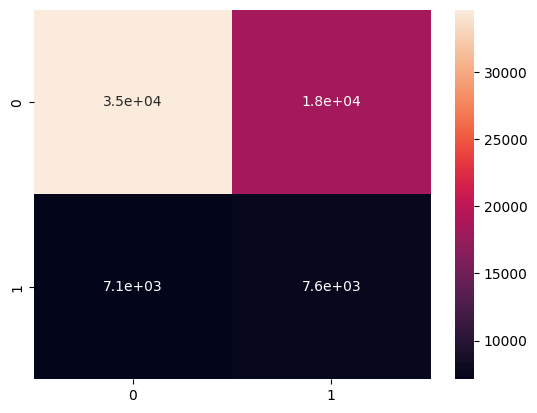

In [213]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [214]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.83      0.66      0.73     52894
           1       0.29      0.52      0.38     14738

    accuracy                           0.62     67632
   macro avg       0.56      0.59      0.55     67632
weighted avg       0.71      0.62      0.65     67632



## XGBoost

### Modelling without SMOTE

In [216]:
import xgboost
from xgboost import XGBClassifier
rsearch1_best_params = {'eval_metric': 'auc',
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 270,
 'reg_alpha': 0.01}

In [217]:
xgbc1 = XGBClassifier(**rsearch1_best_params, random_state=300)
xgbc1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=270,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=300,
              reg_alpha=0.01, reg_lambda=1, ...)

In [218]:
y_train_pred = xgbc1.predict(X_train)
y_test_pred = xgbc1.predict(X_test)
y_train_prob = xgbc1.predict_proba(X_train)
y_test_prob = xgbc1.predict_proba(X_test)

In [219]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.652474761008317
The test AUC score is: 0.6386269454852833


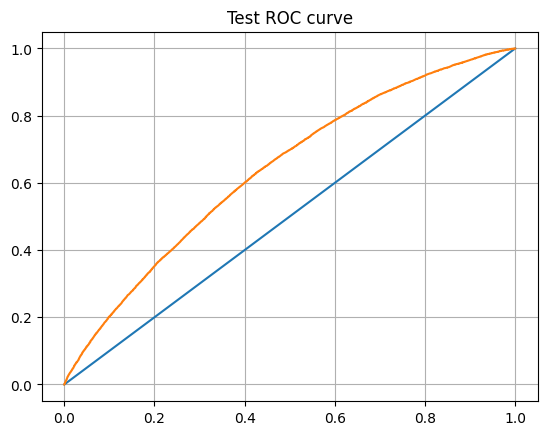

In [220]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [221]:
confusion_matrix(y_test,y_test_pred)

array([[52811,    83],
       [14668,    70]], dtype=int64)

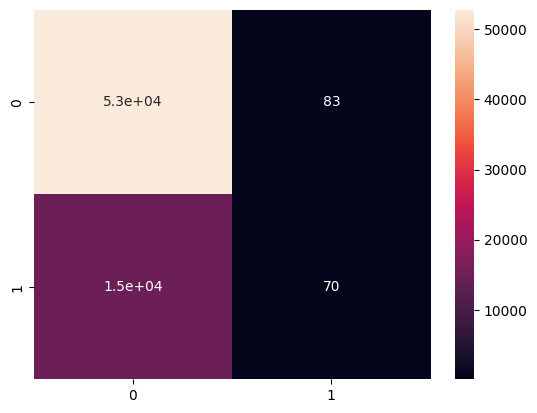

In [222]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [223]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     52894
           1       0.46      0.00      0.01     14738

    accuracy                           0.78     67632
   macro avg       0.62      0.50      0.44     67632
weighted avg       0.71      0.78      0.69     67632



### Modelling with SMOTE

In [224]:
rsearch_best_params = {'eval_metric': 'auc',
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 9,
 'n_estimators': 192,
 'reg_alpha': 0.1}

In [225]:
xgbc = XGBClassifier(**rsearch_best_params, random_state=300)
xgbc.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=192,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=300,
              reg_alpha=0.1, reg_lambda=1, ...)

In [226]:
y_train_pred = xgbc.predict(X_train_sm)
y_test_pred = xgbc.predict(X_test)
y_train_prob = xgbc.predict_proba(X_train_sm)
y_test_prob = xgbc.predict_proba(X_test)

In [227]:
print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.9357872142741008
The test AUC score is: 0.6095321710076236


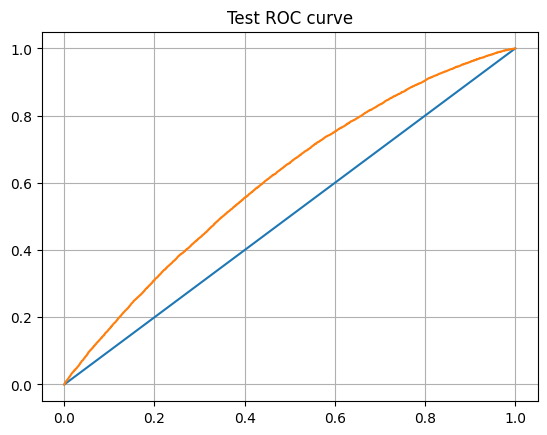

In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [229]:
confusion_matrix(y_test,y_test_pred)

array([[48483,  4411],
       [12679,  2059]], dtype=int64)

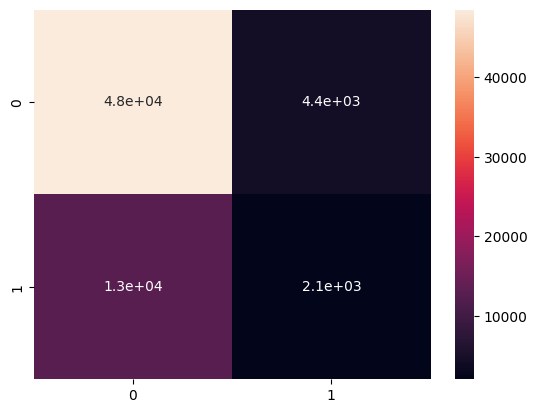

In [230]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [231]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     52894
           1       0.32      0.14      0.19     14738

    accuracy                           0.75     67632
   macro avg       0.56      0.53      0.52     67632
weighted avg       0.69      0.75      0.71     67632



All the hyperparameters are tuned and are same as used before for individual modelling

## Summary stats of all Models

In [233]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model","Train-AUC","Test-AUC","Test-Binary_Log_Loss","F1-Score(1)","SMOTE-applied"]

x.add_row(["Logistic Regression", 0.623, 0.623, 0.509, 0.01,'No'])
x.add_row(["Logistic Regression", 0.624, 0.623, 0.670, 0.39,'Yes'])
x.add_row(["Random Forest Classifier", 0.727, 0.637, 0.503, 0.00,'No'])
x.add_row(["Random Forest Classifier", 0.855, 0.625, 0.614, 0.38,'Yes'])
x.add_row(["LightGBM Classifier", 0.652, 0.639, 0.503, 0.01,'No'])
x.add_row(["LightGBM Classifier", 0.928, 0.601, 0.527, 0.22,'Yes'])
x.add_row(["XGBoost Classifier", 0.652, 0.638, 0.503, 0.01,'No'])
x.add_row(["XGBoost Classifier", 0.936, 0.610, 0.523, 0.20,'Yes'])



print(x)

+--------------------------+-----------+----------+----------------------+-------------+---------------+
|          Model           | Train-AUC | Test-AUC | Test-Binary_Log_Loss | F1-Score(1) | SMOTE-applied |
+--------------------------+-----------+----------+----------------------+-------------+---------------+
|   Logistic Regression    |   0.623   |  0.623   |        0.509         |     0.01    |       No      |
|   Logistic Regression    |   0.624   |  0.623   |         0.67         |     0.39    |      Yes      |
| Random Forest Classifier |   0.727   |  0.637   |        0.503         |     0.0     |       No      |
| Random Forest Classifier |   0.855   |  0.625   |        0.614         |     0.38    |      Yes      |
|   LightGBM Classifier    |   0.652   |  0.639   |        0.503         |     0.01    |       No      |
|   LightGBM Classifier    |   0.928   |  0.601   |        0.527         |     0.22    |      Yes      |
|    XGBoost Classifier    |   0.652   |  0.638   |    

Inference:
The given problem statement requires us to determine the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Hence along with the prediction of whether a person is a defautee/not a defaultee, we also need to predict the probability that a person might default the loan.

Hence to measure the performance of models, we have taken AUC-score, F1-score of 1's and Binary Log Loss as the performance metrics.

Without application of SMOTE, all the models are giving way less F1-score(1s). By the application of SMOTE this issue is cleared(Though the f1-scores can be controlled by selecting the appropriate threshold from the ROC curve).

By looking at the above table containing the performance metrics of various models, we can clearly say that Logistic Regression with SMOTE is performing really well, as compared to other models. It is giving a good AUC scores(not overfitting), and best F1-Score(1). Though the Binary log loss is a bit higher when compared to other models.

The next best model is Random Forest Classifier with SMOTE. Compared to Logistic Regression, it is overfitting a seen from AUC scores. However, it also shows good F1-score(1), slightly lower than Logistic Regression. It has a better(lower) binary log loss, when compared to Logistic Regression.

Apart from these, we have used LightGBM Classifier, XGBoost Classifier and a Stacked Classifier and their performance metrics are displayed in the pretty table above.